In [21]:
from _helper_basics_ import *
from _helper_enhancement_ import *
%reload_ext autoreload

# Perceptual Loss
for Speech Enhancement (Spectrogram)

In [1]:
import sys
## To get helper functions from another folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'home' # home dso test
if now_i_am_at=='home': sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso': sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *
from _helper_enhancement_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras',      keras.__version__)
print('tensorflow', tf.__version__)

Using TensorFlow backend.


keras 2.0.8
tensorflow 1.3.0


# Data

In [2]:
sr = 16000

## Original wavfiles
data_dir = 'E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2'
noisy_dir = os.path.join(data_dir, 'noisy_trainset_28spk_wav')
clean_dir = os.path.join(data_dir, 'clean_trainset_28spk_wav')
print(noisy_dir)
print(clean_dir)

## Saving
pwd = 'E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation'
save_data_dir = os.path.join(pwd, 'Reverb_Data_28spk_wav')
Noise_Mag_dir = os.path.join(save_data_dir, 'Noise_Mag')
Noise_Pha_dir = os.path.join(save_data_dir, 'Noise_Pha')
Clean_Mag_dir = os.path.join(save_data_dir, 'Clean_Mag')
Clean_Pha_dir = os.path.join(save_data_dir, 'Clean_Pha')
print('save_data_dir',save_data_dir)
print('Noise_Mag_dir',Noise_Mag_dir)
print('Noise_Pha_dir',Noise_Pha_dir)
print('Clean_Mag_dir',Clean_Mag_dir)
print('Clean_Pha_dir',Clean_Pha_dir)

noise_files_list = []
for noise_wav in glob.glob( os.path.join(noisy_dir, '*.wav') ):
    noise_wav_term = noise_wav[len(noisy_dir)+1:len(noise_wav)-4]
    noise_files_list.append(noise_wav_term)
len(noise_files_list)

E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2\noisy_trainset_28spk_wav
E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2\clean_trainset_28spk_wav
save_data_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav
Noise_Mag_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Noise_Mag
Noise_Pha_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Noise_Pha
Clean_Mag_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Clean_Mag
Clean_Pha_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Clean_Pha


11572

# Setup 

In [3]:
Archi_dir = "v5_PerceptLoss_Auxilliary/"
Weights_path = Archi_dir+"Logs/"
Ckpt_Mod_Weights_fold = Archi_dir+"Checkpoint_Model_Weights/"
plot_path_dir = Archi_dir+'Plots/'
if not os.path.exists(Archi_dir): os.mkdir(Archi_dir)
if not os.path.exists(Weights_path): os.mkdir(Weights_path)
if not os.path.exists(Ckpt_Mod_Weights_fold): os.mkdir(Ckpt_Mod_Weights_fold)
if not os.path.exists(plot_path_dir): os.mkdir(plot_path_dir)

## Conv_Enhancement:
Enhancement with Inception_selu

In [5]:
########################### Printing information ###########################
Inp_enh, Out_enh, Enhance_mod = build_model_enhance(num_freq=129,num_time=128,num_channel=1, 
                                                    filt_incept_list=[[3,3,3,3,3]], rnn_neu_list=None)
Enhance_mod.summary()
# print_model_weights(Enhance_mod)-

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Noisy_Spect (InputLayer)         (None, 129, 128, 1)   0                                            
____________________________________________________________________________________________________
0_1b_Conv2D (Conv2D)             (None, 129, 128, 3)   6           Noisy_Spect[0][0]                
____________________________________________________________________________________________________
0_1c_Conv2D (Conv2D)             (None, 129, 128, 3)   6           Noisy_Spect[0][0]                
____________________________________________________________________________________________________
0_1a_Conv2D (Conv2D)             (None, 129, 128, 3)   6           Noisy_Spect[0][0]                
___________________________________________________________________________________________

## Conv_Perceptual:
Use VGG features to compare loss, instead of directly compare loss of 

In [6]:
num_freq, num_time, num_channel = 129,128,3
Clean_Inp    = Input((num_freq,num_time,num_channel))
########################## Printing information ###########################
Clean_Out, vgg_model = build_model_percept(Clean_Inp)
vgg_model.summary()
# print_model_weights(vgg_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 129, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 129, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 129, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
Total params: 260,160
Trainable params: 0
Non-trainable params: 260,160
_________________________________________________________________


In [7]:
build_perceptual_loss_enhancement_v5(num_freq=129,num_time=128,num_channel=1, 
                                     filt_incept_list=[[3,3,3,3,3]], rnn_neu_list=None).summary()
#                                      filt_incept_list=[[3,3,3,3,3],[3,3,3,3,3]], rnn_neu_list=None).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Noisy_Spect (InputLayer)         (None, 129, 128, 1)   0                                            
____________________________________________________________________________________________________
0_1b_Conv2D (Conv2D)             (None, 129, 128, 3)   6           Noisy_Spect[0][0]                
____________________________________________________________________________________________________
0_1c_Conv2D (Conv2D)             (None, 129, 128, 3)   6           Noisy_Spect[0][0]                
____________________________________________________________________________________________________
0_1a_Conv2D (Conv2D)             (None, 129, 128, 3)   6           Noisy_Spect[0][0]                
___________________________________________________________________________________________

## Training

In [4]:
num_freq, num_time, num_channel = 129,128,1
Folder_det = [noisy_dir,clean_dir,Noise_Mag_dir,Noise_Pha_dir,Clean_Mag_dir,Clean_Pha_dir]
num_Det = [num_freq,num_time,num_channel]
######################## Training Parameters ###############################
decay = 0;          	print('decay',decay)
steps_per_epoch = 500;	print('steps_per_epoch',steps_per_epoch)
epochs = 150;			print('epochs',epochs)
batch_size = 8;   		print('batch_size',batch_size)

decay 0
steps_per_epoch 500
epochs 150
batch_size 8


# V5 - Perceptual Loss Network
## 4 Inception Layer + Perceptual_Loss_Subnet
Compare loss of Enhanced_Spect_feat with GroundTruth_Spect_feat

#### Initial training : train_model_v1_1

learning_rate 0.001
ckpt_path :  v5_PerceptLoss_Auxilliary/Checkpoint_Model_Weights/v5_1/weights_v5_1_Epoch-{epoch:04d}_L-{loss:.2f}.hdf5 

Epoch 1/70
500/500 [==============================] - 315s - loss: 13.8443 - EnhSpect_4_Conv2D_loss: 0.1162 - PerceptLoss_lay_loss: 13.7281   
Epoch 2/70
500/500 [==============================] - 313s - loss: 11.2598 - EnhSpect_4_Conv2D_loss: 0.0838 - PerceptLoss_lay_loss: 11.1760   
Epoch 3/70
500/500 [==============================] - 312s - loss: 11.9656 - EnhSpect_4_Conv2D_loss: 0.0844 - PerceptLoss_lay_loss: 11.8812   
Epoch 4/70
500/500 [==============================] - 313s - loss: 11.1987 - EnhSpect_4_Conv2D_loss: 0.0815 - PerceptLoss_lay_loss: 11.1173   
Epoch 5/70
500/500 [==============================] - 313s - loss: 10.7311 - EnhSpect_4_Conv2D_loss: 0.0746 - PerceptLoss_lay_loss: 10.6565   
Epoch 6/70
500/500 [==============================] - 313s - loss: 10.7145 - EnhSpect_4_Conv2D_loss: 0.0685 - PerceptLoss_lay_loss: 10.6460   
Ep

500/500 [==============================] - 313s - loss: 7.4153 - EnhSpect_4_Conv2D_loss: 0.0384 - PerceptLoss_lay_loss: 7.3769   
Epoch 48/70
500/500 [==============================] - 312s - loss: 7.6284 - EnhSpect_4_Conv2D_loss: 0.0413 - PerceptLoss_lay_loss: 7.5872   
Epoch 49/70
500/500 [==============================] - 312s - loss: 7.6856 - EnhSpect_4_Conv2D_loss: 0.0414 - PerceptLoss_lay_loss: 7.6442   
Epoch 50/70
500/500 [==============================] - 312s - loss: 7.2959 - EnhSpect_4_Conv2D_loss: 0.0384 - PerceptLoss_lay_loss: 7.2575   
Epoch 51/70
500/500 [==============================] - 313s - loss: 7.0820 - EnhSpect_4_Conv2D_loss: 0.0366 - PerceptLoss_lay_loss: 7.0454   
Epoch 52/70
500/500 [==============================] - 312s - loss: 7.3693 - EnhSpect_4_Conv2D_loss: 0.0390 - PerceptLoss_lay_loss: 7.3303   
Epoch 53/70
500/500 [==============================] - 312s - loss: 7.2562 - EnhSpect_4_Conv2D_loss: 0.0382 - PerceptLoss_lay_loss: 7.2179   
Epoch 54/70
500/50

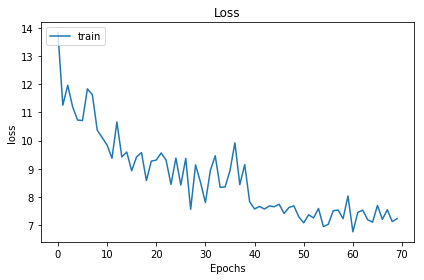

In [20]:
filt_incept_list = [[16, 8, 4, 16, 8], 
                    [32, 16, 8, 32, 16],
                    [32, 16, 8, 32, 16], 
                    [16, 8, 4, 16, 8]]
# filt_incept_list = [[3,3,3,3,3]]
rnn_neu_list = None # [num_freq,num_freq]
Perceptual_mod_v5_1 = build_perceptual_loss_enhancement_v5(num_freq=129,num_time=128,num_channel=1, 
                                     filt_incept_list=filt_incept_list, rnn_neu_list=None)
# Perceptual_mod_v5_1.summary()
######################## Training Parameters ###############################
learning_rate = 1e-3;   print('learning_rate',learning_rate)
adam_opt = Adam(lr=learning_rate, decay=decay)
Perceptual_mod_v5_1.compile(loss='mse' ,optimizer=adam_opt)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_lr=1e-6, cooldown=5, epsilon=1e-05, verbose=1)
CkptFold_det = [  'v5_1',    Ckpt_Mod_Weights_fold, 'v5_1/']
#              [weights_det, Ckpt_Mod_Weights_Fold, Vrs_Fold]
ModelCheckpoint_det = ['loss',     1,            True,              True,           1] 
#              [monitor_modes, verbose_ckpt, save_best_only, save_weights_only, period]
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v5_1_Trglog.txt', '\t', append=False)
plot_path = plot_path_dir+'v5_1.png'
########################### Actual training ##################################
try:
    history_v5_1 = Perceptual_mod_v5_1.fit_generator( infinite_Gen_percept_loss(batch_size), 
#                            steps_per_epoch=2, epochs=2, verbose=2, 
                           steps_per_epoch=steps_per_epoch, epochs=70, verbose=1, 
                           callbacks=[reduce_lr, csv_log, ckpt], 
                           validation_data=None, validation_steps=None, 
                           class_weight=None, max_queue_size=10, workers=1, 
                           use_multiprocessing=False, shuffle=True, initial_epoch=0)history_v5_1.history
plt.figure(figsize=(14,4))
plt.subplot(1,2,1);plot_loss(history_v5_1, metric_list=['EnhSpect_4_Conv2D_loss'], title='Enhancement Loss',  plot_path=plot_path)
plt.subplot(1,2,2);plot_loss(history_v5_1, metric_list=['PerceptLoss_lay_loss'], title='Perceptual Loss', plot_path=plot_path)
plt.tight_layout()
except KeyboardInterrupt:
    print('\n\nKeyboardInterrupt')

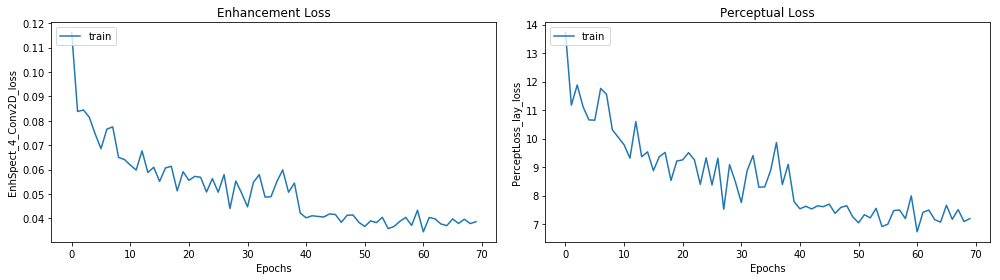

In [10]:
save_or_load = 'save'
model_path = Weights_path+Archi_dir[:-1]+"_model_v5_1.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v5_1.h5"
if save_or_load == 'save':
    save_model(Perceptual_mod_v5_1, model_path, weights_path)
elif save_or_load == 'load':
    Perceptual_mod_v5_1 = load_model(model_path, 'path', weights_path, 'final')
    Perceptual_mod_v5_1.summary()

Saved model : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_model_v5_1.json
Saved weights : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_weights_v5_1.h5


#### 2nd training : train_model_v1_2

Loaded model from path : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_model_v5_1.json
Loaded weights         : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_weights_v5_1.h5
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Noisy_Spect (InputLayer)         (None, 129, 128, 1)   0                                            
____________________________________________________________________________________________________
0_1b_Conv2D (Conv2D)             (None, 129, 128, 8)   16          Noisy_Spect[0][0]                
____________________________________________________________________________________________________
0_1c_Conv2D (Conv2D)             (None, 129, 128, 4)   8           Noisy_Spect[0][0]                
_________________________________________________________________________________________________

500/500 [==============================] - 312s - loss: 6.7902 - EnhSpect_4_Conv2D_loss: 0.0348 - PerceptLoss_lay_loss: 6.7554   
Epoch 28/250
500/500 [==============================] - 312s - loss: 7.2622 - EnhSpect_4_Conv2D_loss: 0.0377 - PerceptLoss_lay_loss: 7.2245   
Epoch 29/250
500/500 [==============================] - 312s - loss: 7.3887 - EnhSpect_4_Conv2D_loss: 0.0378 - PerceptLoss_lay_loss: 7.3510   
Epoch 30/250
500/500 [==============================] - 312s - loss: 7.4463 - EnhSpect_4_Conv2D_loss: 0.0391 - PerceptLoss_lay_loss: 7.4072   
Epoch 31/250
500/500 [==============================] - 312s - loss: 6.3155 - EnhSpect_4_Conv2D_loss: 0.0311 - PerceptLoss_lay_loss: 6.2844   
Epoch 32/250
500/500 [==============================] - 312s - loss: 7.5568 - EnhSpect_4_Conv2D_loss: 0.0390 - PerceptLoss_lay_loss: 7.5178   
Epoch 33/250
500/500 [==============================] - 312s - loss: 7.1828 - EnhSpect_4_Conv2D_loss: 0.0360 - PerceptLoss_lay_loss: 7.1468   
Epoch 34/250

C:\Users\Leonard\Anaconda3\envs\virenv_py3_gpu\lib\site-packages\keras\callbacks.py:869: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.epsilon)
C:\Users\Leonard\Anaconda3\envs\virenv_py3_gpu\lib\site-packages\keras\callbacks.py:407: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):



Epoch 79/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.6738   
Epoch 80/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.0443   
Epoch 81/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.0589   
Epoch 82/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.7289   
Epoch 83/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.0983   
Epoch 84/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.2586   
Epoch 85/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.9906   
Epoch 86/250
500/500 [===========

500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.7423   
Epoch 134/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.5928   
Epoch 135/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 75.9062   
Epoch 136/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.2331   
Epoch 137/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.0883   
Epoch 138/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.5325   
Epoch 139/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.1190   
Epoch 140/250
500/500 [==================

500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.1159   
Epoch 162/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.9357   
Epoch 163/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.8493   
Epoch 164/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.6390   
Epoch 165/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.9781   
Epoch 166/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 80.4226   
Epoch 167/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 80.8350   
Epoch 168/250
500/500 [==================

500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 75.9907   
Epoch 217/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.9116   
Epoch 218/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.0558   
Epoch 219/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.5397   
Epoch 220/250
500/500 [==============================] - 273s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.2924   
Epoch 221/250
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 80.0010   
Epoch 222/250
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.8525   
Epoch 223/250
500/500 [==================

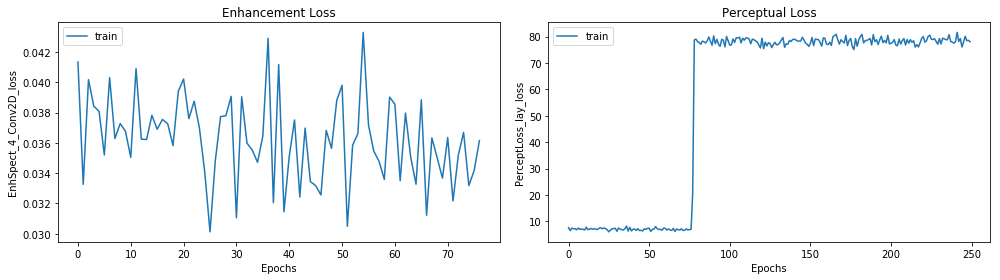

In [13]:
save_or_load = 'load'
model_path = Weights_path+Archi_dir[:-1]+"_model_v5_1.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v5_1.h5"
if save_or_load == 'save':
    save_model(Perceptual_mod_v5_1, model_path, weights_path)
elif save_or_load == 'load':
    Perceptual_mod_v5_2 = load_model(model_path, 'path', weights_path, 'final')
    Perceptual_mod_v5_2.summary()

######################## Training Parameters ###############################
learning_rate = 2e-4;   print('learning_rate',learning_rate)
adam_opt = Adam(lr=learning_rate, decay=decay)
Perceptual_mod_v5_2.compile(loss='mse' ,optimizer=adam_opt)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=20, min_lr=1e-6, cooldown=20, epsilon=1e-06, verbose=1)
CkptFold_det = [  'v5_2',    Ckpt_Mod_Weights_fold, 'v5_2/']
ModelCheckpoint_det = ['loss',     1,            True,              True,           1] 
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v5_2_Trglog.txt', '\t', append=False)
plot_path = plot_path_dir+'v5_2.png'
########################### Actual training ##################################
try:
    history_v5_2 = Perceptual_mod_v5_2.fit_generator( infinite_Gen_percept_loss(batch_size), 
                           steps_per_epoch=steps_per_epoch, epochs=250, verbose=1, 
                           callbacks=[reduce_lr, csv_log, ckpt], 
                           validation_data=None, validation_steps=None, 
                           class_weight=None, max_queue_size=10, workers=1, 
                           use_multiprocessing=False, shuffle=True, initial_epoch=0)
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1);plot_loss(history_v5_2, metric_list=['EnhSpect_4_Conv2D_loss'], title='Enhancement Loss',  plot_path=plot_path)
    plt.subplot(1,2,2);plot_loss(history_v5_2, metric_list=['PerceptLoss_lay_loss'], title='Perceptual Loss', plot_path=plot_path)
    plt.tight_layout()
except KeyboardInterrupt:
    print('\n\nKeyboardInterrupt')

In [14]:
save_or_load = 'save'
model_path = Weights_path+Archi_dir[:-1]+"_model_v5_2_nan_loss.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v5_2_nan_loss.h5"
if save_or_load == 'save':
    save_model(Perceptual_mod_v5_2, model_path, weights_path)

Saved model : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_model_v5_2_nan_loss.json
Saved weights : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_weights_v5_2_nan_loss.h5


#### 3rd training : train_model_v1_3
figure out which data is the problem

Loaded model from path : v5_PerceptLoss_Auxilliary/Logs/v5_PerceptLoss_Auxilliary_model_v5_2.json
Loaded weights         : v5_PerceptLoss_Auxilliary/Checkpoint_Model_Weights/v5_2/weights_v5_2_Epoch-0025_L-6.11.hdf5
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Noisy_Spect (InputLayer)         (None, 129, 128, 1)   0                                            
____________________________________________________________________________________________________
0_1b_Conv2D (Conv2D)             (None, 129, 128, 8)   16          Noisy_Spect[0][0]                
____________________________________________________________________________________________________
0_1c_Conv2D (Conv2D)             (None, 129, 128, 4)   8           Noisy_Spect[0][0]                
______________________________________________________________________________

176/500 [=========>....................] - ETA: 214s - loss: 6.3517 - EnhSpect_4_Conv2D_loss: 0.0305 - PerceptLoss_lay_loss: 6.3212p267_191


292/500 [================>.............] - ETA: 134s - loss: 6.8005 - EnhSpect_4_Conv2D_loss: 0.0334 - PerceptLoss_lay_loss: 6.7670p239_396


409/500 [=======================>......] - ETA: 58s - loss: 6.8275 - EnhSpect_4_Conv2D_loss: 0.0335 - PerceptLoss_lay_loss: 6.7941p273_169


468/500 [===========================>..] - ETA: 20s - loss: 6.7496 - EnhSpect_4_Conv2D_loss: 0.0331 - PerceptLoss_lay_loss: 6.7165p270_315


499/500 [============================>.] - ETA: 0s - loss: 6.6853 - EnhSpect_4_Conv2D_loss: 0.0328 - PerceptLoss_lay_loss: 6.6525p259_071
Epoch 00000: loss improved from inf to 6.68358, saving model to v5_PerceptLoss_Auxilliary/Checkpoint_Model_Weights/v5_3/weights_v5_3_Epoch-0000_L-6.68.hdf5
500/500 [==============================] - 319s - loss: 6.6836 - EnhSpect_4_Conv2D_loss: 0.0328 - PerceptLoss_lay_loss: 6.6508   
Epoch 2/70
p233_168
 83/500 [===>..........................] - ETA: 261s - loss: 5.4710 - EnhSpect_4_Conv2D_loss: 0.0280 - PerceptLoss_lay_loss: 5.4430p244_230


199/500 [==========>...................] - ETA: 188s - loss: 5.7901 - EnhSpect_4_Conv2D_loss: 0.0285 - PerceptLoss_lay_loss: 5.7616p230_387


315/500 [=================>............] - ETA: 115s - loss: 6.0665 - EnhSpect_4_Conv2D_loss: 0.0308 - PerceptLoss_lay_loss: 6.0357p278_108


432/500 [========================>.....] - ETA: 42s - loss: 6.0894 - EnhSpect_4_Conv2D_loss: 0.0303 - PerceptLoss_lay_loss: 6.0591p282_222


491/500 [============================>.] - ETA: 5s - loss: 6.4127 - EnhSpect_4_Conv2D_loss: 0.0325 - PerceptLoss_lay_loss: 6.3802p226_009


499/500 [============================>.] - ETA: 0s - loss: 6.3564 - EnhSpect_4_Conv2D_loss: 0.0322 - PerceptLoss_lay_loss: 6.3242p244_017
Epoch 00001: loss improved from 6.68358 to 6.38977, saving model to v5_PerceptLoss_Auxilliary/Checkpoint_Model_Weights/v5_3/weights_v5_3_Epoch-0001_L-6.39.hdf5
500/500 [==============================] - 313s - loss: 6.3898 - EnhSpect_4_Conv2D_loss: 0.0324 - PerceptLoss_lay_loss: 6.3574   
Epoch 3/70
p258_045
106/500 [=====>........................] - ETA: 246s - loss: 6.4522 - EnhSpect_4_Conv2D_loss: 0.0322 - PerceptLoss_lay_loss: 6.4199p228_050


222/500 [============>.................] - ETA: 174s - loss: 6.3689 - EnhSpect_4_Conv2D_loss: 0.0318 - PerceptLoss_lay_loss: 6.3371p270_199


338/500 [===================>..........] - ETA: 101s - loss: 6.8733 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 6.8377p230_073


455/500 [==========================>...] - ETA: 28s - loss: 6.7786 - EnhSpect_4_Conv2D_loss: 0.0345 - PerceptLoss_lay_loss: 6.7441p254_332


499/500 [============================>.] - ETA: 0s - loss: 6.7666 - EnhSpect_4_Conv2D_loss: 0.0345 - PerceptLoss_lay_loss: 6.7321p274_431
Epoch 00002: loss did not improve
500/500 [==============================] - 313s - loss: 6.7705 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.7359   
Epoch 4/70
p277_051
 71/500 [===>..........................] - ETA: 268s - loss: 7.2214 - EnhSpect_4_Conv2D_loss: 0.0385 - PerceptLoss_lay_loss: 7.1829p269_193


187/500 [==========>...................] - ETA: 196s - loss: 7.4222 - EnhSpect_4_Conv2D_loss: 0.0407 - PerceptLoss_lay_loss: 7.3815p227_333


303/500 [=================>............] - ETA: 123s - loss: 7.2714 - EnhSpect_4_Conv2D_loss: 0.0392 - PerceptLoss_lay_loss: 7.2322p278_178


420/500 [========================>.....] - ETA: 50s - loss: 7.3544 - EnhSpect_4_Conv2D_loss: 0.0392 - PerceptLoss_lay_loss: 7.3152p279_382


479/500 [===========================>..] - ETA: 13s - loss: 7.2237 - EnhSpect_4_Conv2D_loss: 0.0380 - PerceptLoss_lay_loss: 7.1857p254_253


499/500 [============================>.] - ETA: 0s - loss: 7.2094 - EnhSpect_4_Conv2D_loss: 0.0378 - PerceptLoss_lay_loss: 7.1717p258_002
Epoch 00003: loss did not improve
500/500 [==============================] - 313s - loss: 7.2088 - EnhSpect_4_Conv2D_loss: 0.0377 - PerceptLoss_lay_loss: 7.1710   
Epoch 5/70
p286_139
 95/500 [====>.........................] - ETA: 253s - loss: 5.1608 - EnhSpect_4_Conv2D_loss: 0.0249 - PerceptLoss_lay_loss: 5.1359p243_107


211/500 [===========>..................] - ETA: 181s - loss: 6.1015 - EnhSpect_4_Conv2D_loss: 0.0303 - PerceptLoss_lay_loss: 6.0712p230_205


327/500 [==================>...........] - ETA: 108s - loss: 6.4255 - EnhSpect_4_Conv2D_loss: 0.0317 - PerceptLoss_lay_loss: 6.3939p226_100


444/500 [=========================>....] - ETA: 35s - loss: 6.4584 - EnhSpect_4_Conv2D_loss: 0.0320 - PerceptLoss_lay_loss: 6.4264p230_092


499/500 [============================>.] - ETA: 0s - loss: 6.5917 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.5592p259_167
Epoch 00004: loss did not improve
500/500 [==============================] - 313s - loss: 6.5918 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.5592   
Epoch 6/70
p258_402
 60/500 [==>...........................] - ETA: 275s - loss: 6.8951 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 6.8595p236_054


176/500 [=========>....................] - ETA: 203s - loss: 7.1074 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.0707p277_375


292/500 [================>.............] - ETA: 130s - loss: 7.2057 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.1689p278_232


409/500 [=======================>......] - ETA: 57s - loss: 6.8580 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.8234p277_419


468/500 [===========================>..] - ETA: 20s - loss: 7.0083 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9728p276_305


499/500 [============================>.] - ETA: 0s - loss: 7.1393 - EnhSpect_4_Conv2D_loss: 0.0364 - PerceptLoss_lay_loss: 7.1029p273_261
Epoch 00005: loss did not improve
500/500 [==============================] - 313s - loss: 7.1332 - EnhSpect_4_Conv2D_loss: 0.0364 - PerceptLoss_lay_loss: 7.0968   
Epoch 7/70
p276_045
 84/500 [====>.........................] - ETA: 260s - loss: 8.5355 - EnhSpect_4_Conv2D_loss: 0.0454 - PerceptLoss_lay_loss: 8.4902p228_284


200/500 [===========>..................] - ETA: 188s - loss: 7.8576 - EnhSpect_4_Conv2D_loss: 0.0403 - PerceptLoss_lay_loss: 7.8173p259_069


316/500 [=================>............] - ETA: 115s - loss: 7.3644 - EnhSpect_4_Conv2D_loss: 0.0376 - PerceptLoss_lay_loss: 7.3268p279_214


433/500 [========================>.....] - ETA: 42s - loss: 7.5607 - EnhSpect_4_Conv2D_loss: 0.0389 - PerceptLoss_lay_loss: 7.5218p278_254


492/500 [============================>.] - ETA: 5s - loss: 7.6720 - EnhSpect_4_Conv2D_loss: 0.0397 - PerceptLoss_lay_loss: 7.6322p276_145


499/500 [============================>.] - ETA: 0s - loss: 7.6602 - EnhSpect_4_Conv2D_loss: 0.0397 - PerceptLoss_lay_loss: 7.6206p267_286
Epoch 00006: loss did not improve
500/500 [==============================] - 313s - loss: 7.6951 - EnhSpect_4_Conv2D_loss: 0.0399 - PerceptLoss_lay_loss: 7.6553   
Epoch 8/70
p243_279
108/500 [=====>........................] - ETA: 245s - loss: 7.6920 - EnhSpect_4_Conv2D_loss: 0.0395 - PerceptLoss_lay_loss: 7.6525p254_290


224/500 [============>.................] - ETA: 173s - loss: 7.4242 - EnhSpect_4_Conv2D_loss: 0.0387 - PerceptLoss_lay_loss: 7.3855p236_309


340/500 [===================>..........] - ETA: 100s - loss: 7.1960 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1595p230_378


457/500 [==========================>...] - ETA: 26s - loss: 6.9455 - EnhSpect_4_Conv2D_loss: 0.0352 - PerceptLoss_lay_loss: 6.9103p250_368


499/500 [============================>.] - ETA: 0s - loss: 6.9407 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.9057p231_034
Epoch 00007: loss did not improve
500/500 [==============================] - 313s - loss: 6.9712 - EnhSpect_4_Conv2D_loss: 0.0352 - PerceptLoss_lay_loss: 6.9360   
Epoch 9/70
p279_293
 73/500 [===>..........................] - ETA: 267s - loss: 7.0620 - EnhSpect_4_Conv2D_loss: 0.0375 - PerceptLoss_lay_loss: 7.0244p258_074


189/500 [==========>...................] - ETA: 194s - loss: 7.6307 - EnhSpect_4_Conv2D_loss: 0.0411 - PerceptLoss_lay_loss: 7.5896p243_153


305/500 [=================>............] - ETA: 122s - loss: 7.3430 - EnhSpect_4_Conv2D_loss: 0.0395 - PerceptLoss_lay_loss: 7.3035p236_418


422/500 [========================>.....] - ETA: 48s - loss: 7.5841 - EnhSpect_4_Conv2D_loss: 0.0411 - PerceptLoss_lay_loss: 7.5431p282_183


481/500 [===========================>..] - ETA: 11s - loss: 7.6173 - EnhSpect_4_Conv2D_loss: 0.0407 - PerceptLoss_lay_loss: 7.5767p227_172


499/500 [============================>.] - ETA: 0s - loss: 7.4853 - EnhSpect_4_Conv2D_loss: 0.0398 - PerceptLoss_lay_loss: 7.4455p267_186
Epoch 00008: loss did not improve
500/500 [==============================] - 313s - loss: 7.4743 - EnhSpect_4_Conv2D_loss: 0.0398 - PerceptLoss_lay_loss: 7.4345   
Epoch 10/70
p268_026
 97/500 [====>.........................] - ETA: 252s - loss: 6.1436 - EnhSpect_4_Conv2D_loss: 0.0298 - PerceptLoss_lay_loss: 6.1137p267_078


213/500 [===========>..................] - ETA: 179s - loss: 7.1509 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.1153p236_037


329/500 [==================>...........] - ETA: 107s - loss: 7.2008 - EnhSpect_4_Conv2D_loss: 0.0366 - PerceptLoss_lay_loss: 7.1642p243_099


446/500 [=========================>....] - ETA: 33s - loss: 7.3658 - EnhSpect_4_Conv2D_loss: 0.0369 - PerceptLoss_lay_loss: 7.3289p278_271


499/500 [============================>.] - ETA: 0s - loss: 7.3301 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.2930p286_250
Epoch 00009: loss did not improve
500/500 [==============================] - 313s - loss: 7.3174 - EnhSpect_4_Conv2D_loss: 0.0370 - PerceptLoss_lay_loss: 7.2804   
Epoch 11/70
p273_333
 62/500 [==>...........................] - ETA: 274s - loss: 6.1190 - EnhSpect_4_Conv2D_loss: 0.0297 - PerceptLoss_lay_loss: 6.0893p277_352


178/500 [=========>....................] - ETA: 201s - loss: 7.4747 - EnhSpect_4_Conv2D_loss: 0.0382 - PerceptLoss_lay_loss: 7.4365p258_288


294/500 [================>.............] - ETA: 129s - loss: 7.1629 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 7.1275p286_239


411/500 [=======================>......] - ETA: 55s - loss: 7.1600 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.1244p244_106


470/500 [===========================>..] - ETA: 18s - loss: 7.1407 - EnhSpect_4_Conv2D_loss: 0.0357 - PerceptLoss_lay_loss: 7.1050p270_240


499/500 [============================>.] - ETA: 0s - loss: 7.1766 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 7.1407p269_115
Epoch 00010: loss did not improve
500/500 [==============================] - 313s - loss: 7.1705 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 7.1347   
Epoch 12/70
p239_296
 86/500 [====>.........................] - ETA: 259s - loss: 7.4057 - EnhSpect_4_Conv2D_loss: 0.0382 - PerceptLoss_lay_loss: 7.3675p236_107


202/500 [===========>..................] - ETA: 186s - loss: 7.3136 - EnhSpect_4_Conv2D_loss: 0.0380 - PerceptLoss_lay_loss: 7.2756p227_298


318/500 [==================>...........] - ETA: 114s - loss: 6.8225 - EnhSpect_4_Conv2D_loss: 0.0352 - PerceptLoss_lay_loss: 6.7873p269_248


435/500 [=========================>....] - ETA: 40s - loss: 7.2002 - EnhSpect_4_Conv2D_loss: 0.0373 - PerceptLoss_lay_loss: 7.1629p226_140


499/500 [============================>.] - ETA: 0s - loss: 7.0648 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.0284p268_091
Epoch 00011: loss did not improve
500/500 [==============================] - 313s - loss: 7.0604 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.0241   
Epoch 13/70
p228_200
 52/500 [==>...........................] - ETA: 280s - loss: 6.8637 - EnhSpect_4_Conv2D_loss: 0.0357 - PerceptLoss_lay_loss: 6.8280p268_242


168/500 [=========>....................] - ETA: 208s - loss: 6.8700 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.8360p259_307


284/500 [================>.............] - ETA: 135s - loss: 6.7763 - EnhSpect_4_Conv2D_loss: 0.0336 - PerceptLoss_lay_loss: 6.7427p273_072


401/500 [=======================>......] - ETA: 62s - loss: 7.3096 - EnhSpect_4_Conv2D_loss: 0.0378 - PerceptLoss_lay_loss: 7.2718p269_272


460/500 [==========================>...] - ETA: 25s - loss: 7.1155 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.0788p236_055


499/500 [============================>.] - ETA: 0s - loss: 7.4010 - EnhSpect_4_Conv2D_loss: 0.0390 - PerceptLoss_lay_loss: 7.3620p269_085
Epoch 00012: loss did not improve
500/500 [==============================] - 313s - loss: 7.4045 - EnhSpect_4_Conv2D_loss: 0.0390 - PerceptLoss_lay_loss: 7.3655   
Epoch 14/70
p244_358
 76/500 [===>..........................] - ETA: 265s - loss: 7.8331 - EnhSpect_4_Conv2D_loss: 0.0424 - PerceptLoss_lay_loss: 7.7908p286_447


192/500 [==========>...................] - ETA: 193s - loss: 7.0981 - EnhSpect_4_Conv2D_loss: 0.0362 - PerceptLoss_lay_loss: 7.0618p228_009


308/500 [=================>............] - ETA: 120s - loss: 6.7766 - EnhSpect_4_Conv2D_loss: 0.0336 - PerceptLoss_lay_loss: 6.7429p269_138


425/500 [========================>.....] - ETA: 47s - loss: 7.0745 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.0375p277_051


484/500 [============================>.] - ETA: 10s - loss: 7.2351 - EnhSpect_4_Conv2D_loss: 0.0377 - PerceptLoss_lay_loss: 7.1974p287_059


499/500 [============================>.] - ETA: 0s - loss: 7.3256 - EnhSpect_4_Conv2D_loss: 0.0382 - PerceptLoss_lay_loss: 7.2874p267_293
Epoch 00013: loss did not improve
500/500 [==============================] - 313s - loss: 7.3270 - EnhSpect_4_Conv2D_loss: 0.0382 - PerceptLoss_lay_loss: 7.2888   
Epoch 15/70
p239_152
100/500 [=====>........................] - ETA: 250s - loss: 7.6491 - EnhSpect_4_Conv2D_loss: 0.0388 - PerceptLoss_lay_loss: 7.6103p276_287


216/500 [===========>..................] - ETA: 178s - loss: 7.1077 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 7.0720p269_307


332/500 [==================>...........] - ETA: 105s - loss: 6.9382 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.9032p286_404


449/500 [=========================>....] - ETA: 31s - loss: 7.5327 - EnhSpect_4_Conv2D_loss: 0.0395 - PerceptLoss_lay_loss: 7.4933p268_171


499/500 [============================>.] - ETA: 0s - loss: 7.5414 - EnhSpect_4_Conv2D_loss: 0.0393 - PerceptLoss_lay_loss: 7.5021p227_126
Epoch 00014: loss did not improve
500/500 [==============================] - 313s - loss: 7.5993 - EnhSpect_4_Conv2D_loss: 0.0396 - PerceptLoss_lay_loss: 7.5596   
Epoch 16/70
p277_256
 65/500 [==>...........................] - ETA: 272s - loss: 7.7933 - EnhSpect_4_Conv2D_loss: 0.0412 - PerceptLoss_lay_loss: 7.7521p287_089


181/500 [=========>....................] - ETA: 199s - loss: 7.8863 - EnhSpect_4_Conv2D_loss: 0.0416 - PerceptLoss_lay_loss: 7.8447p228_008


297/500 [================>.............] - ETA: 127s - loss: 7.6611 - EnhSpect_4_Conv2D_loss: 0.0413 - PerceptLoss_lay_loss: 7.6198p277_169


414/500 [=======================>......] - ETA: 53s - loss: 7.4442 - EnhSpect_4_Conv2D_loss: 0.0393 - PerceptLoss_lay_loss: 7.4049p233_228


473/500 [===========================>..] - ETA: 16s - loss: 7.4770 - EnhSpect_4_Conv2D_loss: 0.0396 - PerceptLoss_lay_loss: 7.4375p278_202


499/500 [============================>.] - ETA: 0s - loss: 7.4406 - EnhSpect_4_Conv2D_loss: 0.0393 - PerceptLoss_lay_loss: 7.4013p233_386
Epoch 00015: loss did not improve
500/500 [==============================] - 313s - loss: 7.4278 - EnhSpect_4_Conv2D_loss: 0.0392 - PerceptLoss_lay_loss: 7.3885   
Epoch 17/70
p282_326
 89/500 [====>.........................] - ETA: 257s - loss: 6.3563 - EnhSpect_4_Conv2D_loss: 0.0305 - PerceptLoss_lay_loss: 6.3258p268_051


205/500 [===========>..................] - ETA: 184s - loss: 6.3836 - EnhSpect_4_Conv2D_loss: 0.0310 - PerceptLoss_lay_loss: 6.3526p277_242


321/500 [==================>...........] - ETA: 112s - loss: 6.2667 - EnhSpect_4_Conv2D_loss: 0.0309 - PerceptLoss_lay_loss: 6.2358p230_139


438/500 [=========================>....] - ETA: 38s - loss: 6.6117 - EnhSpect_4_Conv2D_loss: 0.0329 - PerceptLoss_lay_loss: 6.5788p278_007


499/500 [============================>.] - ETA: 0s - loss: 6.5628 - EnhSpect_4_Conv2D_loss: 0.0330 - PerceptLoss_lay_loss: 6.5297p231_261
Epoch 00016: loss did not improve
500/500 [==============================] - 313s - loss: 6.5520 - EnhSpect_4_Conv2D_loss: 0.0330 - PerceptLoss_lay_loss: 6.5191   
Epoch 18/70
p239_190
 55/500 [==>...........................] - ETA: 279s - loss: 8.0091 - EnhSpect_4_Conv2D_loss: 0.0384 - PerceptLoss_lay_loss: 7.9707p267_047


171/500 [=========>....................] - ETA: 206s - loss: 8.0095 - EnhSpect_4_Conv2D_loss: 0.0402 - PerceptLoss_lay_loss: 7.9693p256_064


287/500 [================>.............] - ETA: 133s - loss: 7.5991 - EnhSpect_4_Conv2D_loss: 0.0381 - PerceptLoss_lay_loss: 7.5610p259_389


404/500 [=======================>......] - ETA: 60s - loss: 7.2168 - EnhSpect_4_Conv2D_loss: 0.0362 - PerceptLoss_lay_loss: 7.1806p278_140


463/500 [==========================>...] - ETA: 23s - loss: 7.0488 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.0132p236_077


499/500 [============================>.] - ETA: 0s - loss: 6.9698 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.9348p268_178
Epoch 00017: loss did not improve
500/500 [==============================] - 313s - loss: 6.9662 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.9311   
Epoch 19/70
p250_109
 79/500 [===>..........................] - ETA: 263s - loss: 5.9605 - EnhSpect_4_Conv2D_loss: 0.0261 - PerceptLoss_lay_loss: 5.9344p268_010


195/500 [==========>...................] - ETA: 191s - loss: 6.2101 - EnhSpect_4_Conv2D_loss: 0.0296 - PerceptLoss_lay_loss: 6.1805p256_095


311/500 [=================>............] - ETA: 118s - loss: 6.7393 - EnhSpect_4_Conv2D_loss: 0.0335 - PerceptLoss_lay_loss: 6.7058p286_311


428/500 [========================>.....] - ETA: 45s - loss: 7.0614 - EnhSpect_4_Conv2D_loss: 0.0348 - PerceptLoss_lay_loss: 7.0266p250_025


487/500 [============================>.] - ETA: 8s - loss: 7.1116 - EnhSpect_4_Conv2D_loss: 0.0352 - PerceptLoss_lay_loss: 7.0764p244_422


499/500 [============================>.] - ETA: 0s - loss: 7.0936 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 7.0585p239_224
Epoch 00018: loss did not improve
500/500 [==============================] - 313s - loss: 7.0850 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 7.0499   
Epoch 20/70
p236_225
103/500 [=====>........................] - ETA: 248s - loss: 6.3434 - EnhSpect_4_Conv2D_loss: 0.0320 - PerceptLoss_lay_loss: 6.3114p276_378


219/500 [============>.................] - ETA: 176s - loss: 6.5900 - EnhSpect_4_Conv2D_loss: 0.0337 - PerceptLoss_lay_loss: 6.5562p269_008


335/500 [===================>..........] - ETA: 103s - loss: 7.1113 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.0748p230_225


452/500 [==========================>...] - ETA: 30s - loss: 7.0252 - EnhSpect_4_Conv2D_loss: 0.0357 - PerceptLoss_lay_loss: 6.9896p226_316


499/500 [============================>.] - ETA: 0s - loss: 7.1650 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1285p270_055
Epoch 00019: loss did not improve
500/500 [==============================] - 313s - loss: 7.1576 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1211   
Epoch 21/70
p278_135
 68/500 [===>..........................] - ETA: 270s - loss: 7.2252 - EnhSpect_4_Conv2D_loss: 0.0348 - PerceptLoss_lay_loss: 7.1904p276_015


184/500 [==========>...................] - ETA: 198s - loss: 7.5859 - EnhSpect_4_Conv2D_loss: 0.0372 - PerceptLoss_lay_loss: 7.5487p231_419


300/500 [=================>............] - ETA: 125s - loss: 7.3157 - EnhSpect_4_Conv2D_loss: 0.0370 - PerceptLoss_lay_loss: 7.2788p286_359


417/500 [========================>.....] - ETA: 52s - loss: 7.3299 - EnhSpect_4_Conv2D_loss: 0.0370 - PerceptLoss_lay_loss: 7.2929p273_384


476/500 [===========================>..] - ETA: 15s - loss: 7.2784 - EnhSpect_4_Conv2D_loss: 0.0368 - PerceptLoss_lay_loss: 7.2416p278_266


499/500 [============================>.] - ETA: 0s - loss: 7.3199 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.2828p282_294
Epoch 00020: loss did not improve
500/500 [==============================] - 313s - loss: 7.3246 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.2875   
Epoch 22/70
p259_328
 92/500 [====>.........................] - ETA: 255s - loss: 7.4408 - EnhSpect_4_Conv2D_loss: 0.0370 - PerceptLoss_lay_loss: 7.4038p254_377


208/500 [===========>..................] - ETA: 183s - loss: 6.8274 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.7934p267_152


324/500 [==================>...........] - ETA: 110s - loss: 7.0007 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9652p254_313


441/500 [=========================>....] - ETA: 36s - loss: 7.4005 - EnhSpect_4_Conv2D_loss: 0.0381 - PerceptLoss_lay_loss: 7.3624p287_393


499/500 [============================>.] - ETA: 0s - loss: 7.3542 - EnhSpect_4_Conv2D_loss: 0.0376 - PerceptLoss_lay_loss: 7.3166p244_251
Epoch 00021: loss did not improve
500/500 [==============================] - 313s - loss: 7.3456 - EnhSpect_4_Conv2D_loss: 0.0376 - PerceptLoss_lay_loss: 7.3080   
Epoch 23/70
p244_108
 57/500 [==>...........................] - ETA: 277s - loss: 8.9131 - EnhSpect_4_Conv2D_loss: 0.0500 - PerceptLoss_lay_loss: 8.8630p254_354


173/500 [=========>....................] - ETA: 204s - loss: 8.8251 - EnhSpect_4_Conv2D_loss: 0.0473 - PerceptLoss_lay_loss: 8.7777p256_198


289/500 [================>.............] - ETA: 132s - loss: 8.1537 - EnhSpect_4_Conv2D_loss: 0.0430 - PerceptLoss_lay_loss: 8.1108p230_164


406/500 [=======================>......] - ETA: 58s - loss: 7.5918 - EnhSpect_4_Conv2D_loss: 0.0394 - PerceptLoss_lay_loss: 7.5524p274_223


465/500 [==========================>...] - ETA: 21s - loss: 7.4636 - EnhSpect_4_Conv2D_loss: 0.0386 - PerceptLoss_lay_loss: 7.4250p286_404


499/500 [============================>.] - ETA: 0s - loss: 7.4860 - EnhSpect_4_Conv2D_loss: 0.0384 - PerceptLoss_lay_loss: 7.4476p236_227

Epoch 00022: reducing learning rate to 7.999999797903002e-06.
Epoch 00022: loss did not improve
500/500 [==============================] - 313s - loss: 7.5424 - EnhSpect_4_Conv2D_loss: 0.0387 - PerceptLoss_lay_loss: 7.5037   
Epoch 24/70
p228_167
 81/500 [===>..........................] - ETA: 262s - loss: 7.6282 - EnhSpect_4_Conv2D_loss: 0.0423 - PerceptLoss_lay_loss: 7.5858p250_036


197/500 [==========>...................] - ETA: 189s - loss: 6.6696 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.6344p236_369


313/500 [=================>............] - ETA: 117s - loss: 7.2086 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.1715p226_215


430/500 [========================>.....] - ETA: 43s - loss: 7.4317 - EnhSpect_4_Conv2D_loss: 0.0381 - PerceptLoss_lay_loss: 7.3936p269_094


489/500 [============================>.] - ETA: 6s - loss: 7.5887 - EnhSpect_4_Conv2D_loss: 0.0392 - PerceptLoss_lay_loss: 7.5495p273_150


499/500 [============================>.] - ETA: 0s - loss: 7.5728 - EnhSpect_4_Conv2D_loss: 0.0391 - PerceptLoss_lay_loss: 7.5337p279_132
Epoch 00023: loss did not improve
500/500 [==============================] - 313s - loss: 7.6104 - EnhSpect_4_Conv2D_loss: 0.0393 - PerceptLoss_lay_loss: 7.5711   
Epoch 25/70
p277_040
105/500 [=====>........................] - ETA: 247s - loss: 6.8024 - EnhSpect_4_Conv2D_loss: 0.0333 - PerceptLoss_lay_loss: 6.7691p277_067


221/500 [============>.................] - ETA: 174s - loss: 7.1669 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 7.1314p282_270


337/500 [===================>..........] - ETA: 102s - loss: 7.1360 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 7.1002p278_073


454/500 [==========================>...] - ETA: 28s - loss: 7.1633 - EnhSpect_4_Conv2D_loss: 0.0361 - PerceptLoss_lay_loss: 7.1272p267_217


499/500 [============================>.] - ETA: 0s - loss: 7.0218 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.9866p239_327
Epoch 00024: loss did not improve
500/500 [==============================] - 313s - loss: 7.0216 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.9865   
Epoch 26/70
p233_364
 70/500 [===>..........................] - ETA: 269s - loss: 6.3649 - EnhSpect_4_Conv2D_loss: 0.0307 - PerceptLoss_lay_loss: 6.3342p276_464


186/500 [==========>...................] - ETA: 196s - loss: 6.9936 - EnhSpect_4_Conv2D_loss: 0.0357 - PerceptLoss_lay_loss: 6.9580p287_407


302/500 [=================>............] - ETA: 124s - loss: 7.4627 - EnhSpect_4_Conv2D_loss: 0.0378 - PerceptLoss_lay_loss: 7.4249p282_152


419/500 [========================>.....] - ETA: 50s - loss: 7.4280 - EnhSpect_4_Conv2D_loss: 0.0379 - PerceptLoss_lay_loss: 7.3900p228_214


478/500 [===========================>..] - ETA: 13s - loss: 7.2178 - EnhSpect_4_Conv2D_loss: 0.0369 - PerceptLoss_lay_loss: 7.1809p236_259


499/500 [============================>.] - ETA: 0s - loss: 7.1574 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1209p268_361
Epoch 00025: loss did not improve
500/500 [==============================] - 313s - loss: 7.1515 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1150   
Epoch 27/70
p267_287
 93/500 [====>.........................] - ETA: 255s - loss: 8.5951 - EnhSpect_4_Conv2D_loss: 0.0489 - PerceptLoss_lay_loss: 8.5462p267_404


209/500 [===========>..................] - ETA: 182s - loss: 7.1299 - EnhSpect_4_Conv2D_loss: 0.0374 - PerceptLoss_lay_loss: 7.0926p278_057


325/500 [==================>...........] - ETA: 109s - loss: 7.1193 - EnhSpect_4_Conv2D_loss: 0.0366 - PerceptLoss_lay_loss: 7.0827p277_013


442/500 [=========================>....] - ETA: 36s - loss: 6.9794 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 6.9441p279_094


499/500 [============================>.] - ETA: 0s - loss: 6.9744 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.9393p258_015
Epoch 00026: loss did not improve
500/500 [==============================] - 313s - loss: 6.9644 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.9294   
Epoch 28/70
p273_279
 58/500 [==>...........................] - ETA: 277s - loss: 6.9027 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.8676p231_251


174/500 [=========>....................] - ETA: 204s - loss: 7.0062 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 6.9709p273_299


290/500 [================>.............] - ETA: 131s - loss: 7.4617 - EnhSpect_4_Conv2D_loss: 0.0381 - PerceptLoss_lay_loss: 7.4236p269_024


407/500 [=======================>......] - ETA: 58s - loss: 7.5890 - EnhSpect_4_Conv2D_loss: 0.0388 - PerceptLoss_lay_loss: 7.5502p244_111


466/500 [==========================>...] - ETA: 21s - loss: 7.4217 - EnhSpect_4_Conv2D_loss: 0.0377 - PerceptLoss_lay_loss: 7.3840p273_123


499/500 [============================>.] - ETA: 0s - loss: 7.4779 - EnhSpect_4_Conv2D_loss: 0.0379 - PerceptLoss_lay_loss: 7.4401p268_004
Epoch 00027: loss did not improve
500/500 [==============================] - 313s - loss: 7.4690 - EnhSpect_4_Conv2D_loss: 0.0378 - PerceptLoss_lay_loss: 7.4312   
Epoch 29/70
p286_039
 82/500 [===>..........................] - ETA: 262s - loss: 6.9482 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.9142p277_458


198/500 [==========>...................] - ETA: 189s - loss: 6.7733 - EnhSpect_4_Conv2D_loss: 0.0333 - PerceptLoss_lay_loss: 6.7400p274_406


314/500 [=================>............] - ETA: 116s - loss: 7.1369 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 7.1016p233_161


431/500 [========================>.....] - ETA: 43s - loss: 6.8551 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.8211p239_445


490/500 [============================>.] - ETA: 6s - loss: 7.1123 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.0767p276_137


499/500 [============================>.] - ETA: 0s - loss: 7.0539 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 7.0186p236_190
Epoch 00028: loss did not improve
500/500 [==============================] - 313s - loss: 7.0557 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 7.0204   
Epoch 30/70
p273_391
106/500 [=====>........................] - ETA: 246s - loss: 6.4413 - EnhSpect_4_Conv2D_loss: 0.0327 - PerceptLoss_lay_loss: 6.4086p243_123


222/500 [============>.................] - ETA: 174s - loss: 6.6281 - EnhSpect_4_Conv2D_loss: 0.0342 - PerceptLoss_lay_loss: 6.5939p231_161


338/500 [===================>..........] - ETA: 101s - loss: 6.8177 - EnhSpect_4_Conv2D_loss: 0.0345 - PerceptLoss_lay_loss: 6.7833p231_156


455/500 [==========================>...] - ETA: 28s - loss: 6.9021 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.8676p233_072


499/500 [============================>.] - ETA: 0s - loss: 6.7536 - EnhSpect_4_Conv2D_loss: 0.0338 - PerceptLoss_lay_loss: 6.7198p250_205
Epoch 00029: loss did not improve
500/500 [==============================] - 313s - loss: 6.7448 - EnhSpect_4_Conv2D_loss: 0.0338 - PerceptLoss_lay_loss: 6.7110   
Epoch 31/70
p282_025
 71/500 [===>..........................] - ETA: 268s - loss: 5.0417 - EnhSpect_4_Conv2D_loss: 0.0242 - PerceptLoss_lay_loss: 5.0175p227_128


187/500 [==========>...................] - ETA: 196s - loss: 5.8591 - EnhSpect_4_Conv2D_loss: 0.0274 - PerceptLoss_lay_loss: 5.8317p286_017


303/500 [=================>............] - ETA: 123s - loss: 6.0764 - EnhSpect_4_Conv2D_loss: 0.0298 - PerceptLoss_lay_loss: 6.0466p279_051


420/500 [========================>.....] - ETA: 50s - loss: 6.5055 - EnhSpect_4_Conv2D_loss: 0.0322 - PerceptLoss_lay_loss: 6.4733p282_137


479/500 [===========================>..] - ETA: 13s - loss: 6.7414 - EnhSpect_4_Conv2D_loss: 0.0331 - PerceptLoss_lay_loss: 6.7083p226_078


499/500 [============================>.] - ETA: 0s - loss: 6.6547 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.6221p279_015
Epoch 00030: loss did not improve
500/500 [==============================] - 313s - loss: 6.6474 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.6148   
Epoch 32/70
p250_354
 95/500 [====>.........................] - ETA: 253s - loss: 7.4549 - EnhSpect_4_Conv2D_loss: 0.0366 - PerceptLoss_lay_loss: 7.4183p279_198


211/500 [===========>..................] - ETA: 181s - loss: 7.1846 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.1479p278_102


327/500 [==================>...........] - ETA: 108s - loss: 7.0028 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.9677p230_388


444/500 [=========================>....] - ETA: 35s - loss: 6.7889 - EnhSpect_4_Conv2D_loss: 0.0336 - PerceptLoss_lay_loss: 6.7553p231_170


499/500 [============================>.] - ETA: 0s - loss: 6.6455 - EnhSpect_4_Conv2D_loss: 0.0328 - PerceptLoss_lay_loss: 6.6127p256_234
Epoch 00031: loss did not improve
500/500 [==============================] - 313s - loss: 6.6659 - EnhSpect_4_Conv2D_loss: 0.0329 - PerceptLoss_lay_loss: 6.6330   
Epoch 33/70
p287_027
 60/500 [==>...........................] - ETA: 275s - loss: 7.3193 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.2822p227_254


176/500 [=========>....................] - ETA: 203s - loss: 6.6429 - EnhSpect_4_Conv2D_loss: 0.0327 - PerceptLoss_lay_loss: 6.6101p227_047


292/500 [================>.............] - ETA: 130s - loss: 7.0979 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.0616p259_108


409/500 [=======================>......] - ETA: 57s - loss: 7.1625 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1260p244_096


468/500 [===========================>..] - ETA: 20s - loss: 7.1089 - EnhSpect_4_Conv2D_loss: 0.0361 - PerceptLoss_lay_loss: 7.0729p244_095


499/500 [============================>.] - ETA: 0s - loss: 7.1700 - EnhSpect_4_Conv2D_loss: 0.0364 - PerceptLoss_lay_loss: 7.1337p270_106
Epoch 00032: loss did not improve
500/500 [==============================] - 313s - loss: 7.2012 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.1647   
Epoch 34/70
p226_218
 84/500 [====>.........................] - ETA: 260s - loss: 6.5661 - EnhSpect_4_Conv2D_loss: 0.0314 - PerceptLoss_lay_loss: 6.5346p287_158


200/500 [===========>..................] - ETA: 188s - loss: 7.1201 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 7.0842p268_356


316/500 [=================>............] - ETA: 115s - loss: 7.1599 - EnhSpect_4_Conv2D_loss: 0.0366 - PerceptLoss_lay_loss: 7.1233p282_330


433/500 [========================>.....] - ETA: 42s - loss: 6.9842 - EnhSpect_4_Conv2D_loss: 0.0354 - PerceptLoss_lay_loss: 6.9488p231_184


492/500 [============================>.] - ETA: 5s - loss: 6.9550 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9195p230_298


499/500 [============================>.] - ETA: 0s - loss: 6.9248 - EnhSpect_4_Conv2D_loss: 0.0354 - PerceptLoss_lay_loss: 6.8895p286_239
Epoch 00033: loss did not improve
500/500 [==============================] - 313s - loss: 6.9144 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 6.8791   
Epoch 35/70
p267_021
108/500 [=====>........................] - ETA: 245s - loss: 7.6607 - EnhSpect_4_Conv2D_loss: 0.0405 - PerceptLoss_lay_loss: 7.6202p274_354


224/500 [============>.................] - ETA: 173s - loss: 7.3886 - EnhSpect_4_Conv2D_loss: 0.0378 - PerceptLoss_lay_loss: 7.3508p273_381


340/500 [===================>..........] - ETA: 100s - loss: 7.1793 - EnhSpect_4_Conv2D_loss: 0.0368 - PerceptLoss_lay_loss: 7.1425p269_287


457/500 [==========================>...] - ETA: 26s - loss: 6.9185 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.8835p258_174


499/500 [============================>.] - ETA: 0s - loss: 6.8214 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.7869p227_196
Epoch 00034: loss did not improve
500/500 [==============================] - 313s - loss: 6.8440 - EnhSpect_4_Conv2D_loss: 0.0347 - PerceptLoss_lay_loss: 6.8093   
Epoch 36/70
p233_244
 73/500 [===>..........................] - ETA: 267s - loss: 6.6785 - EnhSpect_4_Conv2D_loss: 0.0320 - PerceptLoss_lay_loss: 6.6465p258_096


189/500 [==========>...................] - ETA: 194s - loss: 6.5547 - EnhSpect_4_Conv2D_loss: 0.0320 - PerceptLoss_lay_loss: 6.5227p227_186


305/500 [=================>............] - ETA: 122s - loss: 6.4354 - EnhSpect_4_Conv2D_loss: 0.0318 - PerceptLoss_lay_loss: 6.4036p270_423


422/500 [========================>.....] - ETA: 48s - loss: 6.4507 - EnhSpect_4_Conv2D_loss: 0.0319 - PerceptLoss_lay_loss: 6.4187p226_061


481/500 [===========================>..] - ETA: 11s - loss: 6.4493 - EnhSpect_4_Conv2D_loss: 0.0319 - PerceptLoss_lay_loss: 6.4175p236_080


499/500 [============================>.] - ETA: 0s - loss: 6.4812 - EnhSpect_4_Conv2D_loss: 0.0319 - PerceptLoss_lay_loss: 6.4493p286_413
Epoch 00035: loss did not improve
500/500 [==============================] - 313s - loss: 6.4772 - EnhSpect_4_Conv2D_loss: 0.0319 - PerceptLoss_lay_loss: 6.4453   
Epoch 37/70
p279_106
 97/500 [====>.........................] - ETA: 252s - loss: 7.4171 - EnhSpect_4_Conv2D_loss: 0.0354 - PerceptLoss_lay_loss: 7.3817p277_168


213/500 [===========>..................] - ETA: 179s - loss: 6.7388 - EnhSpect_4_Conv2D_loss: 0.0322 - PerceptLoss_lay_loss: 6.7066p231_080


329/500 [==================>...........] - ETA: 107s - loss: 6.5671 - EnhSpect_4_Conv2D_loss: 0.0318 - PerceptLoss_lay_loss: 6.5352p282_307


446/500 [=========================>....] - ETA: 33s - loss: 6.9300 - EnhSpect_4_Conv2D_loss: 0.0337 - PerceptLoss_lay_loss: 6.8964p274_049


499/500 [============================>.] - ETA: 0s - loss: 6.7584 - EnhSpect_4_Conv2D_loss: 0.0328 - PerceptLoss_lay_loss: 6.7256p239_231
Epoch 00036: loss did not improve
500/500 [==============================] - 313s - loss: 6.7480 - EnhSpect_4_Conv2D_loss: 0.0327 - PerceptLoss_lay_loss: 6.7153   
Epoch 38/70
p231_208
 62/500 [==>...........................] - ETA: 274s - loss: 8.5776 - EnhSpect_4_Conv2D_loss: 0.0423 - PerceptLoss_lay_loss: 8.5353p276_384


112/500 [=====>........................] - ETA: 243s - loss: 7.8215 - EnhSpect_4_Conv2D_loss: 0.0392 - PerceptLoss_lay_loss: 7.7823p254_226
p278_247
179/500 [=========>....................] - ETA: 201s - loss: 7.5540 - EnhSpect_4_Conv2D_loss: 0.0373 - PerceptLoss_lay_loss: 7.5167p233_296


295/500 [================>.............] - ETA: 128s - loss: 7.1837 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.1481p233_267


412/500 [=======================>......] - ETA: 55s - loss: 7.3022 - EnhSpect_4_Conv2D_loss: 0.0374 - PerceptLoss_lay_loss: 7.2648p273_178


471/500 [===========================>..] - ETA: 18s - loss: 7.1330 - EnhSpect_4_Conv2D_loss: 0.0365 - PerceptLoss_lay_loss: 7.0966p228_092


499/500 [============================>.] - ETA: 0s - loss: 7.2549 - EnhSpect_4_Conv2D_loss: 0.0372 - PerceptLoss_lay_loss: 7.2177p276_310
Epoch 00037: loss did not improve
500/500 [==============================] - 313s - loss: 7.2934 - EnhSpect_4_Conv2D_loss: 0.0374 - PerceptLoss_lay_loss: 7.2560   
Epoch 39/70
p267_378
 87/500 [====>.........................] - ETA: 258s - loss: 6.6030 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.5684p236_445


203/500 [===========>..................] - ETA: 186s - loss: 7.3780 - EnhSpect_4_Conv2D_loss: 0.0374 - PerceptLoss_lay_loss: 7.3405p231_348


319/500 [==================>...........] - ETA: 113s - loss: 7.4277 - EnhSpect_4_Conv2D_loss: 0.0373 - PerceptLoss_lay_loss: 7.3903p274_329


436/500 [=========================>....] - ETA: 40s - loss: 7.0721 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.0365p286_374


499/500 [============================>.] - ETA: 0s - loss: 6.9802 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 6.9449p239_403
Epoch 00038: loss did not improve
500/500 [==============================] - 313s - loss: 6.9731 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 6.9378   
Epoch 40/70
p273_020
 53/500 [==>...........................] - ETA: 280s - loss: 7.0276 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.9926p243_083


169/500 [=========>....................] - ETA: 207s - loss: 7.2122 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.1766p282_221


285/500 [================>.............] - ETA: 134s - loss: 6.7854 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.7514p279_151


402/500 [=======================>......] - ETA: 61s - loss: 6.6703 - EnhSpect_4_Conv2D_loss: 0.0329 - PerceptLoss_lay_loss: 6.6373p236_020


461/500 [==========================>...] - ETA: 24s - loss: 6.5780 - EnhSpect_4_Conv2D_loss: 0.0323 - PerceptLoss_lay_loss: 6.5457p286_240


499/500 [============================>.] - ETA: 0s - loss: 6.5779 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.5453p256_089
Epoch 00039: loss did not improve
500/500 [==============================] - 313s - loss: 6.5691 - EnhSpect_4_Conv2D_loss: 0.0325 - PerceptLoss_lay_loss: 6.5365   
Epoch 41/70
p250_456
 77/500 [===>..........................] - ETA: 265s - loss: 6.6094 - EnhSpect_4_Conv2D_loss: 0.0323 - PerceptLoss_lay_loss: 6.5771p243_270


193/500 [==========>...................] - ETA: 192s - loss: 6.5452 - EnhSpect_4_Conv2D_loss: 0.0321 - PerceptLoss_lay_loss: 6.5131p244_328


309/500 [=================>............] - ETA: 119s - loss: 6.4568 - EnhSpect_4_Conv2D_loss: 0.0323 - PerceptLoss_lay_loss: 6.4245p273_392


426/500 [========================>.....] - ETA: 46s - loss: 6.9137 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.8787p230_027


485/500 [============================>.] - ETA: 9s - loss: 7.0349 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 6.9994 p270_143


499/500 [============================>.] - ETA: 0s - loss: 6.9328 - EnhSpect_4_Conv2D_loss: 0.0350 - PerceptLoss_lay_loss: 6.8978p269_221
Epoch 00040: loss did not improve
500/500 [==============================] - 313s - loss: 7.0100 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 6.9744   
Epoch 42/70
p259_046
101/500 [=====>........................] - ETA: 250s - loss: 6.7747 - EnhSpect_4_Conv2D_loss: 0.0337 - PerceptLoss_lay_loss: 6.7410p276_192


217/500 [============>.................] - ETA: 177s - loss: 6.8854 - EnhSpect_4_Conv2D_loss: 0.0334 - PerceptLoss_lay_loss: 6.8520p276_055


294/500 [================>.............] - ETA: 129s - loss: 6.7729 - EnhSpect_4_Conv2D_loss: 0.0335 - PerceptLoss_lay_loss: 6.7394p259_157
p228_321
334/500 [===================>..........] - ETA: 104s - loss: 6.6862 - EnhSpect_4_Conv2D_loss: 0.0327 - PerceptLoss_lay_loss: 6.6535p230_169


451/500 [==========================>...] - ETA: 30s - loss: 6.9025 - EnhSpect_4_Conv2D_loss: 0.0343 - PerceptLoss_lay_loss: 6.8682p287_290


499/500 [============================>.] - ETA: 0s - loss: 6.8028 - EnhSpect_4_Conv2D_loss: 0.0335 - PerceptLoss_lay_loss: 6.7693p256_005
Epoch 00041: loss did not improve
500/500 [==============================] - 313s - loss: 6.8014 - EnhSpect_4_Conv2D_loss: 0.0335 - PerceptLoss_lay_loss: 6.7679   
Epoch 43/70
p287_422
 67/500 [===>..........................] - ETA: 271s - loss: 5.9347 - EnhSpect_4_Conv2D_loss: 0.0273 - PerceptLoss_lay_loss: 5.9074p254_252


183/500 [=========>....................] - ETA: 198s - loss: 6.6600 - EnhSpect_4_Conv2D_loss: 0.0314 - PerceptLoss_lay_loss: 6.6287p258_213


299/500 [================>.............] - ETA: 125s - loss: 6.7322 - EnhSpect_4_Conv2D_loss: 0.0332 - PerceptLoss_lay_loss: 6.6990p256_144


416/500 [=======================>......] - ETA: 52s - loss: 6.4098 - EnhSpect_4_Conv2D_loss: 0.0316 - PerceptLoss_lay_loss: 6.3782p239_130


475/500 [===========================>..] - ETA: 15s - loss: 6.9097 - EnhSpect_4_Conv2D_loss: 0.0348 - PerceptLoss_lay_loss: 6.8749p236_288


499/500 [============================>.] - ETA: 0s - loss: 6.8853 - EnhSpect_4_Conv2D_loss: 0.0347 - PerceptLoss_lay_loss: 6.8507p244_239
Epoch 00042: loss did not improve
500/500 [==============================] - 313s - loss: 6.8768 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.8422   
Epoch 44/70
p259_291
 91/500 [====>.........................] - ETA: 256s - loss: 6.0584 - EnhSpect_4_Conv2D_loss: 0.0316 - PerceptLoss_lay_loss: 6.0268p269_088


207/500 [===========>..................] - ETA: 183s - loss: 6.4206 - EnhSpect_4_Conv2D_loss: 0.0317 - PerceptLoss_lay_loss: 6.3889p243_151


323/500 [==================>...........] - ETA: 110s - loss: 6.8274 - EnhSpect_4_Conv2D_loss: 0.0343 - PerceptLoss_lay_loss: 6.7931p254_052


440/500 [=========================>....] - ETA: 37s - loss: 6.8722 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.8375p277_182


499/500 [============================>.] - ETA: 0s - loss: 6.9993 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9638p226_076
Epoch 00043: loss did not improve


500/500 [==============================] - 313s - loss: 6.9975 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9620   
Epoch 45/70
p226_302
115/500 [=====>........................] - ETA: 241s - loss: 7.1320 - EnhSpect_4_Conv2D_loss: 0.0344 - PerceptLoss_lay_loss: 7.0976p236_134


231/500 [============>.................] - ETA: 168s - loss: 7.2524 - EnhSpect_4_Conv2D_loss: 0.0362 - PerceptLoss_lay_loss: 7.2161p243_390


347/500 [===================>..........] - ETA: 95s - loss: 7.0800 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 7.0449p226_088


406/500 [=======================>......] - ETA: 58s - loss: 7.1992 - EnhSpect_4_Conv2D_loss: 0.0360 - PerceptLoss_lay_loss: 7.1632p244_221


465/500 [==========================>...] - ETA: 21s - loss: 7.1039 - EnhSpect_4_Conv2D_loss: 0.0356 - PerceptLoss_lay_loss: 7.0683p269_014


499/500 [============================>.] - ETA: 0s - loss: 7.0357 - EnhSpect_4_Conv2D_loss: 0.0353 - PerceptLoss_lay_loss: 7.0004p236_301
Epoch 00044: loss did not improve
500/500 [==============================] - 313s - loss: 7.0335 - EnhSpect_4_Conv2D_loss: 0.0352 - PerceptLoss_lay_loss: 6.9982   
Epoch 46/70
p269_195
 81/500 [===>..........................] - ETA: 262s - loss: 5.6554 - EnhSpect_4_Conv2D_loss: 0.0258 - PerceptLoss_lay_loss: 5.6297p282_308


197/500 [==========>...................] - ETA: 189s - loss: 6.6893 - EnhSpect_4_Conv2D_loss: 0.0325 - PerceptLoss_lay_loss: 6.6568p259_404


313/500 [=================>............] - ETA: 117s - loss: 6.3234 - EnhSpect_4_Conv2D_loss: 0.0306 - PerceptLoss_lay_loss: 6.2928p231_180


430/500 [========================>.....] - ETA: 43s - loss: 6.3884 - EnhSpect_4_Conv2D_loss: 0.0319 - PerceptLoss_lay_loss: 6.3565p259_390


489/500 [============================>.] - ETA: 6s - loss: 6.3686 - EnhSpect_4_Conv2D_loss: 0.0315 - PerceptLoss_lay_loss: 6.3372p231_104


499/500 [============================>.] - ETA: 0s - loss: 6.3532 - EnhSpect_4_Conv2D_loss: 0.0314 - PerceptLoss_lay_loss: 6.3218p282_103
Epoch 00045: loss improved from 6.38977 to 6.34740, saving model to v5_PerceptLoss_Auxilliary/Checkpoint_Model_Weights/v5_3/weights_v5_3_Epoch-0045_L-6.35.hdf5
500/500 [==============================] - 313s - loss: 6.3474 - EnhSpect_4_Conv2D_loss: 0.0313 - PerceptLoss_lay_loss: 6.3161   
Epoch 47/70
p269_206
104/500 [=====>........................] - ETA: 248s - loss: 7.7755 - EnhSpect_4_Conv2D_loss: 0.0383 - PerceptLoss_lay_loss: 7.7373p270_102


220/500 [============>.................] - ETA: 175s - loss: 7.1846 - EnhSpect_4_Conv2D_loss: 0.0357 - PerceptLoss_lay_loss: 7.1489p278_007


336/500 [===================>..........] - ETA: 102s - loss: 6.9775 - EnhSpect_4_Conv2D_loss: 0.0344 - PerceptLoss_lay_loss: 6.9431p239_195


453/500 [==========================>...] - ETA: 29s - loss: 7.0695 - EnhSpect_4_Conv2D_loss: 0.0349 - PerceptLoss_lay_loss: 7.0346p277_231


499/500 [============================>.] - ETA: 0s - loss: 7.3804 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.3437p228_365
Epoch 00046: loss did not improve
500/500 [==============================] - 313s - loss: 7.4169 - EnhSpect_4_Conv2D_loss: 0.0370 - PerceptLoss_lay_loss: 7.3799   
Epoch 48/70
p228_148
 69/500 [===>..........................] - ETA: 270s - loss: 5.5557 - EnhSpect_4_Conv2D_loss: 0.0271 - PerceptLoss_lay_loss: 5.5287p226_308


185/500 [==========>...................] - ETA: 197s - loss: 6.7314 - EnhSpect_4_Conv2D_loss: 0.0328 - PerceptLoss_lay_loss: 6.6986p286_162


301/500 [=================>............] - ETA: 124s - loss: 6.8326 - EnhSpect_4_Conv2D_loss: 0.0336 - PerceptLoss_lay_loss: 6.7991p228_346


418/500 [========================>.....] - ETA: 51s - loss: 6.7341 - EnhSpect_4_Conv2D_loss: 0.0331 - PerceptLoss_lay_loss: 6.7010p244_166


477/500 [===========================>..] - ETA: 14s - loss: 6.7271 - EnhSpect_4_Conv2D_loss: 0.0330 - PerceptLoss_lay_loss: 6.6942p228_022


499/500 [============================>.] - ETA: 0s - loss: 6.7964 - EnhSpect_4_Conv2D_loss: 0.0333 - PerceptLoss_lay_loss: 6.7631p269_367
Epoch 00047: loss did not improve
500/500 [==============================] - 313s - loss: 6.7906 - EnhSpect_4_Conv2D_loss: 0.0332 - PerceptLoss_lay_loss: 6.7574   
Epoch 49/70
p259_351
 93/500 [====>.........................] - ETA: 255s - loss: 6.2692 - EnhSpect_4_Conv2D_loss: 0.0329 - PerceptLoss_lay_loss: 6.2362p228_289


209/500 [===========>..................] - ETA: 182s - loss: 6.6961 - EnhSpect_4_Conv2D_loss: 0.0335 - PerceptLoss_lay_loss: 6.6626p231_278


325/500 [==================>...........] - ETA: 109s - loss: 6.5625 - EnhSpect_4_Conv2D_loss: 0.0332 - PerceptLoss_lay_loss: 6.5293p226_343


442/500 [=========================>....] - ETA: 36s - loss: 6.6280 - EnhSpect_4_Conv2D_loss: 0.0337 - PerceptLoss_lay_loss: 6.5943p231_439


499/500 [============================>.] - ETA: 0s - loss: 6.7878 - EnhSpect_4_Conv2D_loss: 0.0345 - PerceptLoss_lay_loss: 6.7533p278_085
Epoch 00048: loss did not improve
500/500 [==============================] - 313s - loss: 6.7787 - EnhSpect_4_Conv2D_loss: 0.0344 - PerceptLoss_lay_loss: 6.7443   
Epoch 50/70
p250_191
 58/500 [==>...........................] - ETA: 277s - loss: 6.6560 - EnhSpect_4_Conv2D_loss: 0.0325 - PerceptLoss_lay_loss: 6.6234p286_281


174/500 [=========>....................] - ETA: 204s - loss: 6.2096 - EnhSpect_4_Conv2D_loss: 0.0301 - PerceptLoss_lay_loss: 6.1795p268_359


290/500 [================>.............] - ETA: 131s - loss: 6.4736 - EnhSpect_4_Conv2D_loss: 0.0315 - PerceptLoss_lay_loss: 6.4421p274_399


407/500 [=======================>......] - ETA: 58s - loss: 6.6029 - EnhSpect_4_Conv2D_loss: 0.0320 - PerceptLoss_lay_loss: 6.5708p228_183


466/500 [==========================>...] - ETA: 21s - loss: 6.5379 - EnhSpect_4_Conv2D_loss: 0.0316 - PerceptLoss_lay_loss: 6.5062p227_049


499/500 [============================>.] - ETA: 0s - loss: 6.6309 - EnhSpect_4_Conv2D_loss: 0.0323 - PerceptLoss_lay_loss: 6.5986p276_252
Epoch 00049: loss did not improve
500/500 [==============================] - 313s - loss: 6.6336 - EnhSpect_4_Conv2D_loss: 0.0323 - PerceptLoss_lay_loss: 6.6013   
Epoch 51/70
p243_398
 82/500 [===>..........................] - ETA: 262s - loss: 6.0604 - EnhSpect_4_Conv2D_loss: 0.0286 - PerceptLoss_lay_loss: 6.0318p226_010


198/500 [==========>...................] - ETA: 189s - loss: 6.4218 - EnhSpect_4_Conv2D_loss: 0.0304 - PerceptLoss_lay_loss: 6.3914p254_215


314/500 [=================>............] - ETA: 116s - loss: 6.3571 - EnhSpect_4_Conv2D_loss: 0.0309 - PerceptLoss_lay_loss: 6.3262p269_299


431/500 [========================>.....] - ETA: 43s - loss: 6.3155 - EnhSpect_4_Conv2D_loss: 0.0312 - PerceptLoss_lay_loss: 6.2843p279_321


490/500 [============================>.] - ETA: 6s - loss: 6.4115 - EnhSpect_4_Conv2D_loss: 0.0318 - PerceptLoss_lay_loss: 6.3797p250_108


499/500 [============================>.] - ETA: 0s - loss: 6.3688 - EnhSpect_4_Conv2D_loss: 0.0316 - PerceptLoss_lay_loss: 6.3373p286_370
Epoch 00050: loss did not improve
500/500 [==============================] - 313s - loss: 6.3614 - EnhSpect_4_Conv2D_loss: 0.0315 - PerceptLoss_lay_loss: 6.3299   
Epoch 52/70
p236_478
106/500 [=====>........................] - ETA: 246s - loss: 7.8289 - EnhSpect_4_Conv2D_loss: 0.0417 - PerceptLoss_lay_loss: 7.7872p250_053


222/500 [============>.................] - ETA: 174s - loss: 7.2309 - EnhSpect_4_Conv2D_loss: 0.0373 - PerceptLoss_lay_loss: 7.1936p287_374


338/500 [===================>..........] - ETA: 101s - loss: 7.2860 - EnhSpect_4_Conv2D_loss: 0.0372 - PerceptLoss_lay_loss: 7.2488p279_303


455/500 [==========================>...] - ETA: 28s - loss: 7.3514 - EnhSpect_4_Conv2D_loss: 0.0371 - PerceptLoss_lay_loss: 7.3142p259_057


499/500 [============================>.] - ETA: 0s - loss: 7.1891 - EnhSpect_4_Conv2D_loss: 0.0362 - PerceptLoss_lay_loss: 7.1530p250_037
Epoch 00051: loss did not improve
500/500 [==============================] - 313s - loss: 7.2081 - EnhSpect_4_Conv2D_loss: 0.0362 - PerceptLoss_lay_loss: 7.1719   
Epoch 53/70
p250_372
 71/500 [===>..........................] - ETA: 268s - loss: 6.5588 - EnhSpect_4_Conv2D_loss: 0.0308 - PerceptLoss_lay_loss: 6.5280p228_254


187/500 [==========>...................] - ETA: 196s - loss: 6.6812 - EnhSpect_4_Conv2D_loss: 0.0330 - PerceptLoss_lay_loss: 6.6482p230_314


303/500 [=================>............] - ETA: 123s - loss: 6.4593 - EnhSpect_4_Conv2D_loss: 0.0314 - PerceptLoss_lay_loss: 6.4279p268_390


420/500 [========================>.....] - ETA: 50s - loss: 6.9334 - EnhSpect_4_Conv2D_loss: 0.0343 - PerceptLoss_lay_loss: 6.8990p270_302


479/500 [===========================>..] - ETA: 13s - loss: 6.7673 - EnhSpect_4_Conv2D_loss: 0.0338 - PerceptLoss_lay_loss: 6.7335p230_285


499/500 [============================>.] - ETA: 0s - loss: 6.8236 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.7896p236_079
Epoch 00052: loss did not improve
500/500 [==============================] - 313s - loss: 6.8186 - EnhSpect_4_Conv2D_loss: 0.0340 - PerceptLoss_lay_loss: 6.7845   
Epoch 54/70
p269_217
 95/500 [====>.........................] - ETA: 253s - loss: 6.8780 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.8434p243_318


211/500 [===========>..................] - ETA: 181s - loss: 7.2458 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 7.2100p270_015


327/500 [==================>...........] - ETA: 108s - loss: 7.2318 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.1951p227_317


444/500 [=========================>....] - ETA: 35s - loss: 6.9975 - EnhSpect_4_Conv2D_loss: 0.0354 - PerceptLoss_lay_loss: 6.9622p279_339


499/500 [============================>.] - ETA: 0s - loss: 7.0245 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 6.9886p244_014
Epoch 00053: loss did not improve
500/500 [==============================] - 313s - loss: 7.0239 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 6.9882   
Epoch 55/70
p256_055
 60/500 [==>...........................] - ETA: 275s - loss: 7.6460 - EnhSpect_4_Conv2D_loss: 0.0385 - PerceptLoss_lay_loss: 7.6075p287_308


176/500 [=========>....................] - ETA: 203s - loss: 6.7035 - EnhSpect_4_Conv2D_loss: 0.0333 - PerceptLoss_lay_loss: 6.6701p256_274


292/500 [================>.............] - ETA: 130s - loss: 6.4915 - EnhSpect_4_Conv2D_loss: 0.0325 - PerceptLoss_lay_loss: 6.4590p258_269


409/500 [=======================>......] - ETA: 57s - loss: 6.8584 - EnhSpect_4_Conv2D_loss: 0.0349 - PerceptLoss_lay_loss: 6.8235p244_385


468/500 [===========================>..] - ETA: 20s - loss: 6.8115 - EnhSpect_4_Conv2D_loss: 0.0347 - PerceptLoss_lay_loss: 6.7769p236_369


499/500 [============================>.] - ETA: 0s - loss: 6.9615 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9259p268_150
Epoch 00054: loss did not improve
500/500 [==============================] - 313s - loss: 6.9520 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9166   
Epoch 56/70
p268_174
 84/500 [====>.........................] - ETA: 260s - loss: 6.2973 - EnhSpect_4_Conv2D_loss: 0.0303 - PerceptLoss_lay_loss: 6.2670p243_193


200/500 [===========>..................] - ETA: 188s - loss: 6.8479 - EnhSpect_4_Conv2D_loss: 0.0331 - PerceptLoss_lay_loss: 6.8148p243_190


316/500 [=================>............] - ETA: 115s - loss: 7.1365 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 7.1010p233_382


433/500 [========================>.....] - ETA: 42s - loss: 7.4885 - EnhSpect_4_Conv2D_loss: 0.0377 - PerceptLoss_lay_loss: 7.4507p256_012


492/500 [============================>.] - ETA: 5s - loss: 7.2247 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.1883p276_448


499/500 [============================>.] - ETA: 0s - loss: 7.2166 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.1803p279_176
Epoch 00055: loss did not improve
500/500 [==============================] - 313s - loss: 7.2104 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.1741   
Epoch 57/70
p273_144
108/500 [=====>........................] - ETA: 245s - loss: 6.3781 - EnhSpect_4_Conv2D_loss: 0.0300 - PerceptLoss_lay_loss: 6.3481p273_043


224/500 [============>.................] - ETA: 172s - loss: 7.0421 - EnhSpect_4_Conv2D_loss: 0.0347 - PerceptLoss_lay_loss: 7.0074p267_084


340/500 [===================>..........] - ETA: 100s - loss: 7.2222 - EnhSpect_4_Conv2D_loss: 0.0361 - PerceptLoss_lay_loss: 7.1860p258_366


457/500 [==========================>...] - ETA: 26s - loss: 7.0280 - EnhSpect_4_Conv2D_loss: 0.0354 - PerceptLoss_lay_loss: 6.9926p254_082


499/500 [============================>.] - ETA: 0s - loss: 7.1530 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.1163p239_301
Epoch 00056: loss did not improve
500/500 [==============================] - 313s - loss: 7.1419 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.1052   
Epoch 58/70
p282_110
 73/500 [===>..........................] - ETA: 267s - loss: 6.3033 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 6.2674p276_117


189/500 [==========>...................] - ETA: 194s - loss: 6.9448 - EnhSpect_4_Conv2D_loss: 0.0360 - PerceptLoss_lay_loss: 6.9088p267_160


305/500 [=================>............] - ETA: 122s - loss: 7.0944 - EnhSpect_4_Conv2D_loss: 0.0362 - PerceptLoss_lay_loss: 7.0582p286_183


422/500 [========================>.....] - ETA: 48s - loss: 6.8435 - EnhSpect_4_Conv2D_loss: 0.0341 - PerceptLoss_lay_loss: 6.8094p230_202


481/500 [===========================>..] - ETA: 11s - loss: 6.6150 - EnhSpect_4_Conv2D_loss: 0.0329 - PerceptLoss_lay_loss: 6.5821p230_401


499/500 [============================>.] - ETA: 0s - loss: 6.5433 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.5106p250_294
Epoch 00057: loss did not improve
500/500 [==============================] - 313s - loss: 6.5356 - EnhSpect_4_Conv2D_loss: 0.0326 - PerceptLoss_lay_loss: 6.5030   
Epoch 59/70
p276_189
 97/500 [====>.........................] - ETA: 252s - loss: 5.8916 - EnhSpect_4_Conv2D_loss: 0.0301 - PerceptLoss_lay_loss: 5.8615p277_199


213/500 [===========>..................] - ETA: 179s - loss: 7.5614 - EnhSpect_4_Conv2D_loss: 0.0391 - PerceptLoss_lay_loss: 7.5223p226_137


329/500 [==================>...........] - ETA: 107s - loss: 7.0432 - EnhSpect_4_Conv2D_loss: 0.0361 - PerceptLoss_lay_loss: 7.0071p267_299


446/500 [=========================>....] - ETA: 33s - loss: 6.8816 - EnhSpect_4_Conv2D_loss: 0.0351 - PerceptLoss_lay_loss: 6.8465p226_037


499/500 [============================>.] - ETA: 0s - loss: 6.9950 - EnhSpect_4_Conv2D_loss: 0.0358 - PerceptLoss_lay_loss: 6.9592p259_295
Epoch 00058: loss did not improve
500/500 [==============================] - 313s - loss: 6.9859 - EnhSpect_4_Conv2D_loss: 0.0357 - PerceptLoss_lay_loss: 6.9502   
Epoch 60/70
p267_373
 62/500 [==>...........................] - ETA: 274s - loss: 5.5656 - EnhSpect_4_Conv2D_loss: 0.0262 - PerceptLoss_lay_loss: 5.5394p273_328


178/500 [=========>....................] - ETA: 201s - loss: 6.3188 - EnhSpect_4_Conv2D_loss: 0.0310 - PerceptLoss_lay_loss: 6.2878p227_027


294/500 [================>.............] - ETA: 129s - loss: 6.4754 - EnhSpect_4_Conv2D_loss: 0.0314 - PerceptLoss_lay_loss: 6.4440p278_003


411/500 [=======================>......] - ETA: 55s - loss: 6.7185 - EnhSpect_4_Conv2D_loss: 0.0329 - PerceptLoss_lay_loss: 6.6856p231_157


470/500 [===========================>..] - ETA: 18s - loss: 6.8928 - EnhSpect_4_Conv2D_loss: 0.0346 - PerceptLoss_lay_loss: 6.8581p273_199


499/500 [============================>.] - ETA: 0s - loss: 6.8695 - EnhSpect_4_Conv2D_loss: 0.0345 - PerceptLoss_lay_loss: 6.8350p273_113
Epoch 00059: loss did not improve
500/500 [==============================] - 313s - loss: 6.8618 - EnhSpect_4_Conv2D_loss: 0.0345 - PerceptLoss_lay_loss: 6.8274   
Epoch 61/70
p286_358
 86/500 [====>.........................] - ETA: 259s - loss: 7.9418 - EnhSpect_4_Conv2D_loss: 0.0424 - PerceptLoss_lay_loss: 7.8994p231_243


202/500 [===========>..................] - ETA: 186s - loss: 7.3634 - EnhSpect_4_Conv2D_loss: 0.0379 - PerceptLoss_lay_loss: 7.3255p276_098


318/500 [==================>...........] - ETA: 114s - loss: 7.1500 - EnhSpect_4_Conv2D_loss: 0.0363 - PerceptLoss_lay_loss: 7.1138p226_075


435/500 [=========================>....] - ETA: 40s - loss: 6.7445 - EnhSpect_4_Conv2D_loss: 0.0337 - PerceptLoss_lay_loss: 6.7108p259_172


499/500 [============================>.] - ETA: 0s - loss: 6.7997 - EnhSpect_4_Conv2D_loss: 0.0339 - PerceptLoss_lay_loss: 6.7658p270_208
Epoch 00060: loss did not improve
500/500 [==============================] - 313s - loss: 6.8134 - EnhSpect_4_Conv2D_loss: 0.0339 - PerceptLoss_lay_loss: 6.7795   
Epoch 62/70
p230_374
 52/500 [==>...........................] - ETA: 280s - loss: 7.3895 - EnhSpect_4_Conv2D_loss: 0.0376 - PerceptLoss_lay_loss: 7.3519p228_006


168/500 [=========>....................] - ETA: 208s - loss: 7.1733 - EnhSpect_4_Conv2D_loss: 0.0367 - PerceptLoss_lay_loss: 7.1366p250_282


284/500 [================>.............] - ETA: 135s - loss: 6.8810 - EnhSpect_4_Conv2D_loss: 0.0344 - PerceptLoss_lay_loss: 6.8466p267_132


401/500 [=======================>......] - ETA: 62s - loss: 6.9331 - EnhSpect_4_Conv2D_loss: 0.0359 - PerceptLoss_lay_loss: 6.8972p250_483


460/500 [==========================>...] - ETA: 25s - loss: 6.9585 - EnhSpect_4_Conv2D_loss: 0.0355 - PerceptLoss_lay_loss: 6.9230p236_193


499/500 [============================>.] - ETA: 0s - loss: 6.8613 - EnhSpect_4_Conv2D_loss: 0.0349 - PerceptLoss_lay_loss: 6.8264p231_034
Epoch 00061: loss did not improve
500/500 [==============================] - 313s - loss: 6.8498 - EnhSpect_4_Conv2D_loss: 0.0349 - PerceptLoss_lay_loss: 6.8150   
Epoch 63/70
p236_451
 80/500 [===>..........................] - ETA: 240s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: infp256_200


204/500 [===========>..................] - ETA: 165s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: infp244_381


266/500 [==============>...............] - ETA: 130s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: infp274_214
p254_040
329/500 [==================>...........] - ETA: 94s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: infp267_039


455/500 [==========================>...] - ETA: 24s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: infp258_096


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: infp254_349
Epoch 00062: loss did not improve
500/500 [==============================] - 276s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: inf   

C:\Users\Leonard\Anaconda3\envs\virenv_py3_gpu\lib\site-packages\keras\callbacks.py:869: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.epsilon)
C:\Users\Leonard\Anaconda3\envs\virenv_py3_gpu\lib\site-packages\keras\callbacks.py:407: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):



Epoch 64/70
p279_152
120/500 [======>.......................] - ETA: 208s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 75.1932p279_069


240/500 [=============>................] - ETA: 142s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.7512p282_162


361/500 [====================>.........] - ETA: 76s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.3671p269_154


483/500 [===========================>..] - ETA: 9s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.4962p236_044


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.4594p258_275
Epoch 00063: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.3922   
Epoch 65/70
p258_031
103/500 [=====>........................] - ETA: 218s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.3083p250_192


223/500 [============>.................] - ETA: 152s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.0223p269_073


343/500 [===================>..........] - ETA: 86s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.4958p259_329


465/500 [==========================>...] - ETA: 19s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.3512p250_362


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.4783p226_225
Epoch 00064: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.5539   
Epoch 66/70
p236_024
 85/500 [====>.........................] - ETA: 227s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 75.8722p259_063


205/500 [===========>..................] - ETA: 162s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.6763p277_244


325/500 [==================>...........] - ETA: 96s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.7829p269_011


447/500 [=========================>....] - ETA: 29s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.9532p254_364


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.6030p256_111
Epoch 00065: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.5651   
Epoch 67/70
p230_132
 67/500 [===>..........................] - ETA: 237s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.6510p273_434


187/500 [==========>...................] - ETA: 171s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.3217p250_277


307/500 [=================>............] - ETA: 106s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.4160p279_233


429/500 [========================>.....] - ETA: 39s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.3241p274_051


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.9304p254_278

Epoch 00066: reducing learning rate to 1.5999999959603884e-06.
Epoch 00066: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.8785   
Epoch 68/70
p267_404
 50/500 [==>...........................] - ETA: 247s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.5587p282_164


170/500 [=========>....................] - ETA: 181s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 81.4001p287_409


224/500 [============>.................] - ETA: 151s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 81.5394p279_154
p250_185
291/500 [================>.............] - ETA: 114s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 80.5834p278_371


352/500 [====================>.........] - ETA: 81s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 80.3709p243_111


474/500 [===========================>..] - ETA: 14s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.6438p243_066


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.5850p286_023
Epoch 00067: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 79.5341   
Epoch 69/70
p258_023
 94/500 [====>.........................] - ETA: 222s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 81.9266p226_215


214/500 [===========>..................] - ETA: 157s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 78.4297p268_029


334/500 [===================>..........] - ETA: 91s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.3043p254_264


456/500 [==========================>...] - ETA: 24s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.8788p244_173


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.8376p267_030
Epoch 00068: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.8195   
Epoch 70/70
p239_256
 76/500 [===>..........................] - ETA: 233s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.4443p259_314


196/500 [==========>...................] - ETA: 167s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 77.6615p228_039


316/500 [=================>............] - ETA: 101s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.3065p269_058


438/500 [=========================>....] - ETA: 34s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.2655p274_165


499/500 [============================>.] - ETA: 0s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.5547p226_104
Epoch 00069: loss did not improve
500/500 [==============================] - 274s - loss: nan - EnhSpect_4_Conv2D_loss: nan - PerceptLoss_lay_loss: 76.4949   


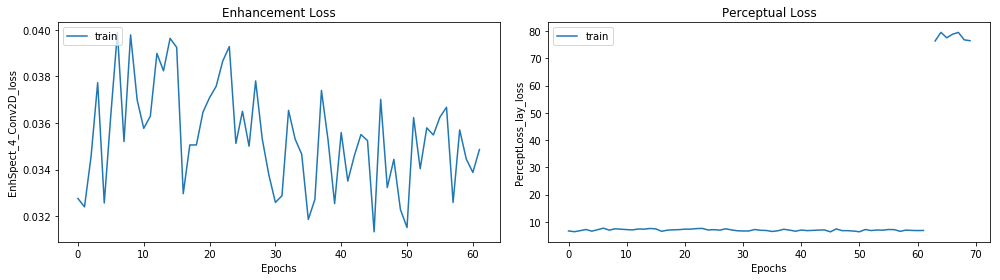

In [5]:
from _helper_basics_ import *
from _helper_enhancement_ import *
%reload_ext autoreload

Folder_det = [noisy_dir,clean_dir,Noise_Mag_dir,Noise_Pha_dir,Clean_Mag_dir,Clean_Pha_dir]
num_Det = [num_freq,num_time,num_channel]

save_or_load = 'load'
model_path = Weights_path+Archi_dir[:-1]+"_model_v5_2.json"
weights_path = Ckpt_Mod_Weights_fold+"v5_2/weights_v5_2_Epoch-0025_L-6.11.hdf5"
if save_or_load == 'save':
    save_model(_, model_path, weights_path)
elif save_or_load == 'load':
    Perceptual_mod_v5_3 = load_model(model_path, 'path', weights_path, 'final')
    Perceptual_mod_v5_3.summary()
######################## Training Parameters ###############################
learning_rate = 4e-5;   print('learning_rate',learning_rate)
adam_opt = Adam(lr=learning_rate, decay=decay)
Perceptual_mod_v5_3.compile(loss='mse' ,optimizer=adam_opt)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=20, min_lr=1e-6, cooldown=20, epsilon=1e-06, verbose=1)
CkptFold_det = [  'v5_3',    Ckpt_Mod_Weights_fold, 'v5_3/']
ModelCheckpoint_det = ['loss',     1,            True,              True,           1] 
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v5_3_Trglog.txt', '\t', append=False)
plot_path = plot_path_dir+'v5_3.png'
########################### Actual training ##################################
try:
    history_v5_3 = Perceptual_mod_v5_3.fit_generator( infinite_Gen_percept_loss(batch_size,noise_files_list,Folder_det,num_Det), 
                           steps_per_epoch=steps_per_epoch, epochs=70, verbose=1, 
                           callbacks=[reduce_lr, csv_log, ckpt], 
                           validation_data=None, validation_steps=None, 
                           class_weight=None, max_queue_size=10, workers=1, 
                           use_multiprocessing=False, shuffle=True, initial_epoch=0)
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1);plot_loss(history_v5_3, metric_list=['EnhSpect_4_Conv2D_loss'], title='Enhancement Loss',  plot_path=plot_path)
    plt.subplot(1,2,2);plot_loss(history_v5_3, metric_list=['PerceptLoss_lay_loss'], title='Perceptual Loss', plot_path=plot_path)
    plt.tight_layout()
except KeyboardInterrupt:
    print('\n\nKeyboardInterrupt')

# debugging

In [2]:
sr = 16000

## Original wavfiles
data_dir = 'E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2'
noisy_dir = os.path.join(data_dir, 'noisy_trainset_28spk_wav')
clean_dir = os.path.join(data_dir, 'clean_trainset_28spk_wav')
print(noisy_dir)
print(clean_dir)

## Saving
pwd = 'E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation'
save_data_dir = os.path.join(pwd, 'Reverb_Data_28spk_wav')
Noise_Mag_dir = os.path.join(save_data_dir, 'Noise_Mag')
Noise_Pha_dir = os.path.join(save_data_dir, 'Noise_Pha')
Clean_Mag_dir = os.path.join(save_data_dir, 'Clean_Mag')
Clean_Pha_dir = os.path.join(save_data_dir, 'Clean_Pha')
print('save_data_dir',save_data_dir)
print('Noise_Mag_dir',Noise_Mag_dir)
print('Noise_Pha_dir',Noise_Pha_dir)
print('Clean_Mag_dir',Clean_Mag_dir)
print('Clean_Pha_dir',Clean_Pha_dir)

noise_files_list = []
for noise_wav in glob.glob( os.path.join(noisy_dir, '*.wav') ):
    noise_wav_term = noise_wav[len(noisy_dir)+1:len(noise_wav)-4]
    noise_files_list.append(noise_wav_term)
len(noise_files_list)

E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2\noisy_trainset_28spk_wav
E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2\clean_trainset_28spk_wav
save_data_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav
Noise_Mag_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Noise_Mag
Noise_Pha_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Noise_Pha
Clean_Mag_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Clean_Mag
Clean_Pha_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Clean_Pha


11572

In [ ]:
sr = 16000

## Original wavfiles
data_dir = 'E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2'
noisy_dir = os.path.join(data_dir, 'noisy_trainset_28spk_wav')
clean_dir = os.path.join(data_dir, 'clean_trainset_28spk_wav')
print(noisy_dir)
print(clean_dir)

## Saving
pwd = 'E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation'
save_data_dir = os.path.join(pwd, 'Reverb_Data_28spk_wav')
Noise_Mag_dir = os.path.join(save_data_dir, 'Noise_Mag')
Noise_Pha_dir = os.path.join(save_data_dir, 'Noise_Pha')
Clean_Mag_dir = os.path.join(save_data_dir, 'Clean_Mag')
Clean_Pha_dir = os.path.join(save_data_dir, 'Clean_Pha')
print('save_data_dir',save_data_dir)
print('Noise_Mag_dir',Noise_Mag_dir)
print('Noise_Pha_dir',Noise_Pha_dir)
print('Clean_Mag_dir',Clean_Mag_dir)
print('Clean_Pha_dir',Clean_Pha_dir)

noise_files_list = []
for noise_wav in glob.glob( os.path.join(noisy_dir, '*.wav') ):
    noise_wav_term = noise_wav[len(noisy_dir)+1:len(noise_wav)-4]
    noise_files_list.append(noise_wav_term)
len(noise_files_list)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Leonard HDD\\Dropbox\\Speech Audio Text\\3) Dataset\\Reverb_2\\noisy_trainset_28spk_wav.wav\\p268_283'

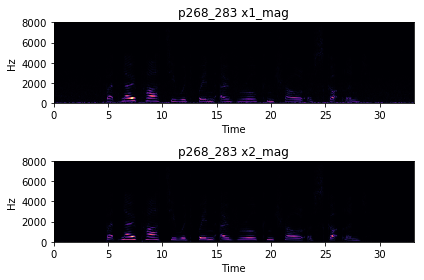

In [14]:
noise_wav_term = 'p268_283'
# noise_wav_term = 'p274_284'
# noise_wav_term = 'p250_464'

## Load noisy spectrogram
x1_mag = dump_load_pickle(os.path.join(Noise_Mag_dir,noise_wav_term+'_mag'), 'load')
## Load Clean spectrogram
x2_mag = dump_load_pickle(os.path.join(Clean_Mag_dir,noise_wav_term+'_mag'), 'load')

plt.subplot(211); display_audio(x1_mag, noise_wav_term+' x1_mag', sr, 'spec')
plt.subplot(212); display_audio(x2_mag, noise_wav_term+' x2_mag', sr, 'spec')
plt.tight_layout()

x1,sr = read_audio(os.path.join(noisy_dir+'.wav',noise_wav_term) )
x2,sr = read_audio(os.path.join(clean_dir+'.wav',noise_wav_term) )
display_audio(x1, None, sr, 'audio')
display_audio(x2, None, sr, 'audio')